# Question 1
Create a comprehensive revenue trend analysis showing yearly revenue growth from 2015-2025. Include percentage growth rates, trend lines, and highlight key growth periods with annotations.
# Question 2
Analyze seasonal patterns in sales data. Create monthly sales heatmaps and identify peak selling months. Compare seasonal trends across different years and categories.
# Question 3
Build a customer segmentation analysis using RFM (Recency, Frequency, Monetary) methodology. Create scatter plots and segment customers into meaningful groups with actionable insights.
# Question 4
Visualize the evolution of payment methods from 2015-2025. Show the rise of UPI, decline of COD, and create stacked area charts to demonstrate market share changes over time.
# Question 5
Perform category-wise performance analysis. Create treemaps, bar charts, and pie charts showing revenue contribution, growth rates, and market share for each product category.
# Question 6
Analyze Prime membership impact on customer behavior. Compare average order values, order frequency, and category preferences between Prime and non-Prime customers using multiple visualization types.
# Question 7
Create geographic analysis of sales performance across Indian cities and states. Build choropleth maps and bar charts showing revenue density and growth patterns by tier (Metro/Tier1/Tier2/Rural).
# Question 8
Study festival sales impact using before/during/after analysis. Visualize revenue spikes during Diwali, Prime Day, and other festivals with detailed time series analysis.
# Question 9
Analyze customer age group behavior and preferences. Create demographic analysis with category preferences, spending patterns, and shopping frequency across different age segments.
# Question 10
Build price vs demand analysis using scatter plots and correlation matrices. Analyze how pricing strategies affect sales volumes across different categories and customer segments.
# Question 11
Create delivery performance analysis showing delivery days distribution, on-time performance, and customer satisfaction correlation with delivery speed across different cities and customer tiers.
# Question 12
Analyze return patterns and customer satisfaction using return rates, reasons, and correlation with product ratings, prices, and categories through multiple visualization techniques.
# Question 13
Study brand performance and market share evolution. Create brand comparison charts, market share trends, and competitive positioning analysis across different categories.
# Question 14
Build customer lifetime value (CLV) analysis using cohort analysis, retention curves, and CLV distribution across different customer segments and acquisition years.
# Question 15
Analyze discount and promotional effectiveness. Create discount impact analysis showing correlation between discount percentages, sales volumes, and revenue across categories and time periods.
# Question 16
Study product rating patterns and their impact on sales. Analyze rating distributions, correlation with sales performance, and identify patterns across categories and price ranges.
# Question 17
Create customer journey analysis showing purchase frequency patterns, category transitions, and customer evolution from first purchase to loyal customers using flow diagrams and transition matrices.
# Question 18
Analyze inventory and product lifecycle patterns. Study product launch success, decline phases, and category evolution over the decade with detailed trend analysis.
# Question 19
Build competitive pricing analysis comparing brand positioning, price ranges, and market penetration strategies across different product categories using box plots and competitive matrices.
# Question 20
Create a comprehensive business health dashboard combining key metrics like revenue growth, customer acquisition, retention rates, and operational efficiency using multi-panel visualizations with executive summary insights.


# Question 1

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import squarify  # for treemap
import plotly.express as px
import numpy as np
from operator import attrgetter
from collections import defaultdict
import plotly.graph_objects as go  # For Sankey diagram

class DataVisualization:
    def __init__(self, dataset_path, output_dir):
        self.dataset_path = dataset_path
        self.output_dir = output_dir
        os.makedirs(self.output_dir, exist_ok=True)
    
    # Load and merge yearly CSV files
    def load_and_merge_yearly_files(self, folder_path=None):
        if folder_path is None:
            folder_path = self.dataset_path

        # Get all CSV files in the folder
        csv_files = sorted([f for f in os.listdir(folder_path) if f.endswith('.csv') and '20' in f])
        
        all_dataframes = []

        for file in csv_files:
            file_path = os.path.join(folder_path, file)
            df = pd.read_csv(file_path)
            # print(len(df))
            all_dataframes.append(df)

        # Combine all data
        combined_df = pd.concat(all_dataframes, ignore_index=True)

        return combined_df

    # Question 1: Yearly Revenue Trend Analysis (2015–2025)
    def analyze_yearly_revenue_trend(self, df):
        # Ensure clean_order_date is datetime
        df['clean_order_date'] = pd.to_datetime(df['clean_order_date'], errors='coerce')

        # Group by year and sum revenue
        yearly_revenue = df.groupby('order_year')['clean_final_amount_inr'].sum().reset_index()
        yearly_revenue.rename(columns={'clean_final_amount_inr': 'total_revenue_inr'}, inplace=True)

        # Calculate YoY growth
        yearly_revenue['yoy_growth_percent'] = yearly_revenue['total_revenue_inr'].pct_change() * 100

        # Plot
        plt.figure(figsize=(12, 6))
        sns.lineplot(data=yearly_revenue, x='order_year', y='total_revenue_inr', marker='o', label='Total Revenue')

        # Add YoY growth annotations
        for i in range(1, len(yearly_revenue)):
            growth = yearly_revenue.loc[i, 'yoy_growth_percent']
            year = yearly_revenue.loc[i, 'order_year']
            revenue = yearly_revenue.loc[i, 'total_revenue_inr']
            plt.text(year, revenue, f'{growth:.1f}%', ha='center', va='bottom', fontsize=9, color='green' if growth > 0 else 'red')

        # Trend line
        sns.regplot(data=yearly_revenue, x='order_year', y='total_revenue_inr',
                    scatter=False, label='Trend Line', ci=None, color='blue')

        plt.title('Yearly Revenue Trend (2015–2025)', fontsize=14)
        plt.xlabel('Year')
        plt.ylabel('Revenue (INR)')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()

        # Save plot
        plt.savefig(os.path.join(self.output_dir, 'Q1_Revenue_Trend_2015_2025.png'), dpi=300)
        plt.close("all")

        # Save CSV
        yearly_revenue.to_csv(os.path.join(self.output_dir, 'Q1_Yearly_Revenue_Data.csv'), index=False)
    
    # Question 2: Seasonal Pattern Analysis (Monthly Sales Heatmap, Peak Months, Seasonal Trends)
    def seasonal_pattern_analysis(self, df):
        # Convert order_month to int if it's not already
        df['order_month'] = df['order_month'].astype(int)
        df['order_year'] = df['order_year'].astype(int)

        # --- 1. Monthly Sales Heatmap (Year vs Month) ---

        monthly_sales = df.groupby(['order_year', 'order_month'])['clean_final_amount_inr'].sum().reset_index()

        # Pivot for heatmap
        sales_pivot = monthly_sales.pivot(index='order_month', columns='order_year', values='clean_final_amount_inr')

        plt.figure(figsize=(12, 6))
        sns.heatmap(sales_pivot, annot=False, fmt=".0f", cmap="YlGnBu", linecolor="black", linewidths=1)
        plt.title("Monthly Sales Heatmap (INR)")
        plt.ylabel("Month")
        plt.xlabel("Year")
        plt.savefig(os.path.join(self.output_dir, "Q2_monthly_sales_heatmap.png"), dpi=300, bbox_inches='tight')
        # plt.show()

        # --- 2. Identify Peak Selling Months (Overall) ---

        monthly_totals = df.groupby('order_month')['clean_final_amount_inr'].sum().sort_values(ascending=False)
        # print("\nPeak Selling Months by Total Sales:")
        # print(monthly_totals)
        monthly_sales.to_csv(os.path.join(self.output_dir, "Q2_Monthly_total_sales.csv"), index=False)

        plt.figure(figsize=(10, 5))
        sns.barplot(x=monthly_totals.index, y=monthly_totals.values, palette="viridis", hue=monthly_totals.values)
        plt.title("Total Sales by Month")
        plt.xlabel("Month")
        plt.ylabel("Total Sales (INR)")
        plt.savefig(os.path.join(self.output_dir, "Q2_total_sales_by_month.png"), dpi=300, bbox_inches='tight')
        # plt.show()

        # --- 3. Compare Seasonal Trends Across Years ---

        monthly_yearly = df.groupby(['order_year', 'order_month'])['clean_final_amount_inr'].sum().reset_index()

        plt.figure(figsize=(14, 7))
        for year in sorted(monthly_yearly['order_year'].unique()):
            data = monthly_yearly[monthly_yearly['order_year'] == year]
            plt.plot(data['order_month'], data['clean_final_amount_inr'], marker='o', label=str(year))

        plt.title('Seasonal Sales Trend by Year')
        plt.xlabel('Month')
        plt.ylabel('Total Sales (INR)')
        plt.xticks(range(1, 13))
        plt.legend(title='Year')
        plt.grid(True)
        plt.savefig(os.path.join(self.output_dir, "Q2_seasonal_trends_by_year.png"), dpi=300, bbox_inches='tight')
        # plt.show()

        # --- 4. Compare Seasonal Trends Across Categories ---

        # Use cleaned_category column
        category_monthly = df.groupby(['cleaned_category', 'order_month'])['clean_final_amount_inr'].sum().reset_index()

        # Normalize sales per category to compare patterns
        category_monthly['normalized_sales'] = category_monthly.groupby('cleaned_category')['clean_final_amount_inr'].transform(lambda x: x / x.sum())

        # Plot with facet grid
        g = sns.FacetGrid(category_monthly, col='cleaned_category', col_wrap=3, height=4, sharey=False)
        g.map_dataframe(sns.lineplot, x='order_month', y='normalized_sales', marker='o')
        g.set_titles(col_template="{col_name}")
        g.set_axis_labels("Month", "Normalized Sales")
        plt.subplots_adjust(top=0.9)
        g.figure.suptitle("Normalized Seasonal Sales by Category")
        g.savefig(os.path.join(self.output_dir, "Q2_seasonal_trends_by_category.png"), dpi=300, bbox_inches='tight')
        # plt.show()
        plt.close('all')

    # Question 3: Customer Segmentation (RFM Analysis)
    def rfm_segment_name(self, score):
        if score >= 13:
            return 'Champions'
        elif score >= 10:
            return 'Loyal Customers'
        elif score >= 7:
            return 'Potential Loyalists'
        elif score >= 5:
            return 'Needs Attention'
        else:
            return 'At Risk'

    def customer_segmentation_analysis(self, df):

        # 2. Convert order_date to datetime if not already
        df['clean_order_date'] = pd.to_datetime(df['clean_order_date'], errors='coerce')

        # 3. Set a reference date for Recency calculation (e.g., day after last order in data)
        reference_date = df['clean_order_date'].max() + pd.Timedelta(days=1)

        # 4. Calculate Recency, Frequency, Monetary per customer
        rfm = df.groupby('customer_id').agg({
            'clean_order_date': lambda x: (reference_date - x.max()).days,  # Recency
            'transaction_id': 'nunique',                             # Frequency (count unique transactions)
            'clean_final_amount_inr': 'sum'                          # Monetary
        }).reset_index()

        rfm.rename(columns={
            'clean_order_date': 'Recency',
            'transaction_id': 'Frequency',
            'clean_final_amount_inr': 'Monetary'
        }, inplace=True)

        # 5. Explore distribution
        # Save the full RFM data (per customer)
        rfm.to_csv(os.path.join(self.output_dir, "Q3_rfm_customers.csv"), index=False)

        rfm.describe().to_csv(os.path.join(self.output_dir, "Q3_rfm_describe.csv"), index=False)

        # print(rfm.describe())

        # 6. RFM Scoring (scale 1-5)
        recency_bins = pd.qcut(rfm['Recency'], q=5, duplicates='drop')
        rfm['R_Score'] = pd.qcut(rfm['Recency'], q=5, labels=range(len(recency_bins.cat.categories), 0, -1), duplicates='drop')

        # For Frequency
        frequency_bins = pd.qcut(rfm['Frequency'], q=5, duplicates='drop')
        rfm['F_Score'] = pd.qcut(rfm['Frequency'], q=5, labels=range(1, len(frequency_bins.cat.categories) + 1), duplicates='drop')

        # For Monetary
        monetary_bins = pd.qcut(rfm['Monetary'], q=5, duplicates='drop')
        rfm['M_Score'] = pd.qcut(rfm['Monetary'], q=5, labels=range(1, len(monetary_bins.cat.categories) + 1), duplicates='drop')

        # Combine scores into a single RFM segment
        rfm['RFM_Segment'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)
        rfm['RFM_Score'] = rfm[['R_Score', 'F_Score', 'M_Score']].astype(int).sum(axis=1)
        rfm['Segment'] = rfm['RFM_Score'].apply(self.rfm_segment_name)

        # 8. Plotting RFM segments scatter plots

        plt.figure(figsize=(12,5))

        plt.subplot(1, 2, 1)
        sns.scatterplot(data=rfm, x='Recency', y='Frequency', hue='Segment', palette='Set2', alpha=0.7)
        plt.title('Recency vs Frequency')
        plt.xlabel('Recency (days)')
        plt.ylabel('Frequency (Number of Transactions)')

        plt.subplot(1, 2, 2)
        sns.scatterplot(data=rfm, x='Monetary', y='Frequency', hue='Segment', palette='Set2', alpha=0.7)
        plt.title('Monetary vs Frequency')
        plt.xlabel('Monetary (Total Spend INR)')
        plt.ylabel('Frequency (Number of Transactions)')

        plt.tight_layout()
        plt.savefig(os.path.join(self.output_dir, "Q3_rfm_scatterplots.png"), dpi=300, bbox_inches='tight')
        # plt.show()

        # 9. Summary stats per segment
        segment_summary = rfm.groupby('Segment').agg({
            'Recency': 'mean',
            'Frequency': 'mean',
            'Monetary': ['mean', 'count']
        }).round(1)
        # print(segment_summary)
        # Flatten multi-index columns
        segment_summary.columns = ['_'.join(col).strip() for col in segment_summary.columns.values]
        segment_summary.reset_index(inplace=True)

        # Save to CSV
        segment_summary.to_csv(os.path.join(self.output_dir, "Q3_rfm_segment_summary.csv"), index=False)
        plt.close('all')

    # Question 4: Payment Method Evolution (2015–2025)
    def payment_method_evolution(self, df):
        # Filter years between 2015 and 2025
        df = df[(df['order_year'] >= 2015) & (df['order_year'] <= 2025)]

        # Group by year and payment method
        payment_trend = df.groupby(['order_year', 'standard_payment_method'])['transaction_id'].count().reset_index()
        payment_trend.rename(columns={'transaction_id': 'transaction_count'}, inplace=True)

        # Pivot the data
        pivot_df = payment_trend.pivot(index='order_year', columns='standard_payment_method', values='transaction_count').fillna(0)

        # Normalize to get market share (optional)
        pivot_percent = pivot_df.div(pivot_df.sum(axis=1), axis=0)

        # Plot
        plt.figure(figsize=(14, 7))
        pivot_percent.plot(kind='area', stacked=True, colormap='tab20', alpha=0.85)

        plt.title('Evolution of Payment Methods (2015–2025)', fontsize=16)
        plt.xlabel('Year')
        plt.ylabel('Market Share (Proportion of Transactions)')
        plt.legend(title='Payment Method', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(True)
        plt.tight_layout()
        plt.savefig(os.path.join(self.output_dir, "Q4_payment_method_evolution_pivot_plot.png"), dpi=300, bbox_inches='tight')
        # plt.show()

        # Group by year and payment method, count transactions
        line_data = df.groupby(['order_year', 'standard_payment_method'])['transaction_id'].count().reset_index()
        line_data.rename(columns={'transaction_id': 'transaction_count'}, inplace=True)

        # Pivot to wide format for line plot
        line_pivot = line_data.pivot(index='order_year', columns='standard_payment_method', values='transaction_count').fillna(0)

        # Plot line chart
        plt.figure(figsize=(14, 7))
        for column in line_pivot.columns:
            plt.plot(line_pivot.index, line_pivot[column], marker='o', label=column)

        # Formatting
        plt.title('Payment Method Trends (2015–2025)', fontsize=16)
        plt.xlabel('Year')
        plt.ylabel('Number of Transactions')
        plt.legend(title='Payment Method', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(True)
        plt.tight_layout()
        plt.savefig(os.path.join(self.output_dir, "Q4_payment_method_evolution_line_plot.png"), dpi=300, bbox_inches='tight')
        # plt.show()
        plt.close('all')

    # Question 5: Category-wise Performance Analysis
    def category_wise_performance_analysis(self, df):
        # 1. Revenue Contribution by Category (Treemap)
        # Use cleaned category and cleaned final amount
        df['category'] = df['subcategory'].fillna('Unknown')
        df['revenue'] = df['clean_final_amount_inr']
        df["main_category"] = df["cleaned_category"].fillna("Unknown")

        # Aggregate revenue by category
        cat_rev = df.groupby('category')['revenue'].sum().sort_values(ascending=False).reset_index()

        # # Treemap
        # Aggregate revenue by category + subcategory
        agg_df = df.groupby(['main_category', 'category'])['revenue'].sum().reset_index()

        # Create treemap
        fig = px.treemap(
            agg_df,
            path=['main_category', 'category'],  # Hierarchical path
            values='revenue',
            color='revenue',
            color_continuous_scale='Blues',
            title='Revenue Contribution by Category and Subcategory'
        )

        # Show the treemap
        # fig.show()

        # Save the treemap to a file
        # this needs kaleido package to save as image and environment variable set for chrome path
        # Save as static image (PNG)
        # fig.write_image("Q5_category_revenue_treemap.png", scale=2)

        # Save as interactive HTML
        fig.write_html(os.path.join(self.output_dir, "Q5_category_revenue_treemap.html"))
        # fig.close()

        #2. Revenue Contribution by Category (Bar Chart)
        plt.figure(figsize=(12, 6))
        sns.barplot(data=cat_rev, x='revenue', y='category', palette='viridis', hue='revenue')
        plt.title('Revenue by Product Category')
        plt.xlabel('Revenue (INR)')
        plt.ylabel('Category')
        plt.tight_layout()
        plt.savefig(os.path.join(self.output_dir, "Q5_category_revenue_bar_chart.png"), dpi=300, bbox_inches='tight')
        # plt.show()

        #3. Revenue Share by Category (Pie Chart)
        top_cats = cat_rev.head(6)
        others = pd.DataFrame([{
            'category': 'Others',
            'revenue': cat_rev['revenue'][6:].sum()
        }])
        pie_df = pd.concat([top_cats, others])

        plt.figure(figsize=(8, 8))
        plt.pie(pie_df['revenue'], labels=pie_df['category'], autopct='%1.1f%%', startangle=140)
        plt.title('Market Share by Category')
        plt.axis('equal')
        plt.savefig(os.path.join(self.output_dir, "Q5_category_revenue_pie_chart.png"), dpi=300, bbox_inches='tight')
        # plt.show()

        #4. YoY Revenue Growth by Category (Line Chart)
        # Group by year and category
        cat_year = df.groupby(['order_year', 'category'])['revenue'].sum().reset_index()

        # Pivot to wide format
        cat_year_pivot = cat_year.pivot(index='order_year', columns='category', values='revenue').fillna(0)

        # Calculate YoY growth (%)
        growth_df = cat_year_pivot.pct_change().dropna() * 100

        # --- Changed: Use all categories instead of top 5 ---
        all_categories = growth_df.columns.tolist()

        # Plot YoY growth for all categories - Pivot Bar Plot
        growth_df[all_categories].plot(kind='bar', figsize=(16, 8), colormap='tab20')  # 'tab20' is good for many colors
        plt.title('Year-on-Year Revenue Growth by Category (All Categories)')
        plt.ylabel('Growth Rate (%)')
        plt.xlabel('Year')
        plt.axhline(0, color='black', linewidth=0.5)
        plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
        plt.tight_layout()
        plt.savefig(os.path.join(self.output_dir, "Q5_category_yoy_growth_pivot_plot_all.png"), dpi=300, bbox_inches='tight')
        # plt.show()

        # --- Changed: Plot line chart for all categories ---
        plt.figure(figsize=(16, 9))
        for cat in all_categories:
            plt.plot(growth_df.index, growth_df[cat], marker='o', label=cat)

        plt.axhline(0, color='gray', linestyle='--', linewidth=0.7)
        plt.title('YoY Revenue Growth by Category (All Categories)', fontsize=16)
        plt.xlabel('Year')
        plt.ylabel('YoY Growth Rate (%)')
        plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
        plt.grid(True)
        plt.tight_layout()
        plt.savefig(os.path.join(self.output_dir, "Q5_category_yoy_growth_line_plot_all.png"), dpi=300, bbox_inches='tight')
        # plt.show()

        #5 Category Revenue Trend Over Time (Line Chart)
        # cat_year_pivot[top_5].plot(kind='line', figsize=(14, 6), marker='o')
        all_categories = cat_year_pivot.columns.tolist()  # Get all categories
        cat_year_pivot[all_categories].plot(kind='line', figsize=(16, 8), marker='o')
        plt.title('Category-wise Revenue Trend (2015–2025)')
        plt.ylabel('Revenue (INR)')
        plt.xlabel('Year')
        plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(True)
        plt.tight_layout()
        plt.savefig(os.path.join(self.output_dir, "Q5_category_revenue_trend_line_plot.png"), dpi=300, bbox_inches='tight')
        # plt.show()
        plt.close('all')

    # Question 6: Prime Membership Impact on Customer Behavior
    def prime_membership_impact_on_customer_behavior(self, df):
        # Calculate AOV (average order value) by Prime membership
        aov = df.groupby('cleaned_is_prime_member')['clean_final_amount_inr'].mean().reset_index()
        aov['Prime Member'] = aov['cleaned_is_prime_member'].map({True: 'Prime', False: 'Non-Prime'})

        # Plot AOV comparison
        plt.figure(figsize=(8, 5))
        sns.barplot(data=aov, x='Prime Member', y='clean_final_amount_inr', palette='Set2', hue='Prime Member')
        plt.title('Average Order Value by Prime Membership')
        plt.ylabel('Average Order Value (INR)')
        plt.xlabel('')
        plt.tight_layout()
        plt.savefig(os.path.join(self.output_dir, 'Q6_average_order_value_prime_vs_nonprime.png'), dpi=300)
        # plt.show()

        # Order frequency by Prime membership
        order_counts = df.groupby(['customer_id', 'cleaned_is_prime_member'])['transaction_id'].nunique().reset_index(name='order_count')

        order_freq = order_counts.groupby('cleaned_is_prime_member')['order_count'].mean().reset_index()
        order_freq['Prime Member'] = order_freq['cleaned_is_prime_member'].map({True: 'Prime', False: 'Non-Prime'})

        plt.figure(figsize=(8, 5))
        sns.barplot(data=order_freq, x='Prime Member', y='order_count', palette='Set1', hue='Prime Member')
        plt.title('Average Order Frequency per Customer by Prime Membership')
        plt.ylabel('Average Number of Orders')
        plt.xlabel('')
        plt.tight_layout()
        plt.savefig(os.path.join(self.output_dir, 'Q6_order_frequency_prime_vs_nonprime.png'), dpi=300)
        # plt.show()

        # category preference by Prime membership
        category_rev = df.groupby(['cleaned_is_prime_member', 'cleaned_category'])['clean_final_amount_inr'].sum().reset_index()

        category_rev['total_rev_by_group'] = category_rev.groupby('cleaned_is_prime_member')['clean_final_amount_inr'].transform('sum')
        category_rev['revenue_share_pct'] = 100 * category_rev['clean_final_amount_inr'] / category_rev['total_rev_by_group']

        category_rev['Prime Member'] = category_rev['cleaned_is_prime_member'].map({True: 'Prime', False: 'Non-Prime'})

        plt.figure(figsize=(14, 8))
        sns.barplot(data=category_rev, x='cleaned_category', y='revenue_share_pct', hue='Prime Member', palette='pastel')
        plt.xticks(rotation=45, ha='right')
        plt.title('Category Revenue Share by Prime Membership')
        plt.ylabel('Revenue Share (%)')
        plt.xlabel('Category')
        plt.legend(title='Prime Membership')
        plt.tight_layout()
        plt.savefig(os.path.join(self.output_dir, 'Q6_category_preference_prime_vs_nonprime.png'), dpi=300)
        # plt.show()
        plt.close('all')
    
    # Question 7: Geographic Sales Analysis
    def geographic_sales_analysis(self, df):
        # Aggregate revenue by city, state, and tier
        revenue_by_city = df.groupby(['cleaned_customer_city', 'customer_state', 'customer_tier'])['clean_final_amount_inr'].sum().reset_index()

        # Aggregate revenue by year and tier for growth analysis
        revenue_by_year_tier = df.groupby(['order_year', 'customer_tier'])['clean_final_amount_inr'].sum().reset_index()

        # Get the most common tier per city
        tier_map = df.groupby('cleaned_customer_city')['customer_tier'].agg(lambda x: x.mode()[0]).reset_index()

        # Aggregate revenue by state
        revenue_by_state = df.groupby('customer_state')['clean_final_amount_inr'].sum().reset_index()

        plt.figure(figsize=(14, 6))
        sns.barplot(data=revenue_by_state, x='customer_state', y='clean_final_amount_inr', palette='Blues_d', hue="customer_state")
        plt.xticks(rotation=45, ha='right')
        plt.title('Revenue by State')
        plt.ylabel('Total Revenue (INR)')
        plt.xlabel('State')
        plt.tight_layout()
        plt.savefig(os.path.join(self.output_dir, "Q7_revenue_by_state.png"), dpi=300)
        # plt.show()

        # Aggregate revenue by city
        revenue_by_city = df.groupby('cleaned_customer_city')['clean_final_amount_inr'].sum().reset_index().sort_values(by='clean_final_amount_inr', ascending=False)

        # Merge the tier info
        revenue_by_city = revenue_by_city.merge(tier_map, on='cleaned_customer_city')

        # Plot
        plt.figure(figsize=(14, 6))
        sns.barplot(data=revenue_by_city, x='cleaned_customer_city', y='clean_final_amount_inr', palette='Greens_d', hue="cleaned_customer_city")
        plt.xticks(rotation=45, ha='right')
        plt.title('Revenue Generating Cities')
        plt.ylabel('Total Revenue (INR)')
        plt.xlabel('City')
        plt.tight_layout()
        plt.savefig(os.path.join(self.output_dir, "Q7_city_revenue.png"), dpi=300)
        # plt.show()

        # Plot
        plt.figure(figsize=(max(14, revenue_by_city['cleaned_customer_city'].nunique() * 0.3), 8))
        scatter = sns.scatterplot(
            data=revenue_by_city,
            x='cleaned_customer_city',
            y='clean_final_amount_inr',
            size='clean_final_amount_inr',
            hue='customer_tier',
            palette='Set2',
            sizes=(50, 1500),
            legend="auto",
            alpha=0.7,
        )

        plt.xticks(rotation=90)
        plt.title('Bubble Chart: Revenue by City and Tier')
        plt.xlabel('City')
        plt.ylabel('Total Revenue (INR)')
        plt.legend(title='Customer Tier', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.savefig(os.path.join(self.output_dir, "Q7_bubble_chart_city_tier.png"), dpi=300)
        # plt.show()

        # Revenue by year and customer tier
        revenue_by_year_tier = df.groupby(['order_year', 'customer_tier'])['clean_final_amount_inr'].sum().reset_index()

        # Plot
        plt.figure(figsize=(12, 6))
        sns.lineplot(data=revenue_by_year_tier, x='order_year', y='clean_final_amount_inr', hue='customer_tier', marker='o', palette='Set2')
        plt.title('Revenue Growth by Tier (YoY)')
        plt.ylabel('Revenue (INR)')
        plt.xlabel('Year')
        plt.grid(True)
        plt.tight_layout()
        plt.savefig(os.path.join(self.output_dir, "Q7_revenue_growth_by_tier.png"), dpi=300)
        # plt.show()

        latest_year = df['order_year'].max()
        rev_latest = df[df['order_year'] == latest_year].groupby('customer_tier')['clean_final_amount_inr'].sum().reset_index()

        # Pie chart
        plt.figure(figsize=(7, 7))
        plt.pie(rev_latest['clean_final_amount_inr'], labels=rev_latest['customer_tier'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
        plt.title(f'Revenue Share by Customer Tier ({latest_year})')
        plt.savefig(os.path.join(self.output_dir, "Q7_revenue_share_by_tier_pie.png"), dpi=300)
        # plt.show()
        plt.close('all')

    # Question 8: Festival Sales Impact Analysis
    def festival_sales_impact_analysis(self, df):
        df['clean_order_date'] = pd.to_datetime(df['clean_order_date']).dt.normalize()

        festivals_df = df[df['cleaned_is_festival_sale'] == True].copy()
        unique_festivals = festivals_df['festival_name'].dropna().unique()

        sns.set_style(style="whitegrid")
        fig, ax = plt.subplots(figsize=(14, 7))

        window_size = 7  # days before and after festival day

        for fest in unique_festivals:
            fest_sales = festivals_df[festivals_df['festival_name'] == fest].copy()
            fest_dates = pd.to_datetime(fest_sales['clean_order_date'].dt.normalize().unique())

            # DataFrame to hold all relative day revenues stacked
            rel_day_data = []

            for fest_day in fest_dates:
                start_date = fest_day - pd.Timedelta(days=window_size)
                end_date = fest_day + pd.Timedelta(days=window_size)

                # Filter sales in window
                window_df = df[(df['clean_order_date'] >= start_date) & (df['clean_order_date'] <= end_date)].copy()

                # Calculate relative day
                window_df['rel_day'] = (window_df['clean_order_date'] - fest_day).dt.days

                # Aggregate revenue by relative day
                daily_rev = window_df.groupby('rel_day')['clean_final_amount_inr'].sum().reset_index()

                rel_day_data.append(daily_rev)

            # Concatenate all festival occurrences
            combined_rel_day = pd.concat(rel_day_data)

            # Group by relative day to get total revenue across all years
            avg_rel_day_rev = combined_rel_day.groupby('rel_day')['clean_final_amount_inr'].mean().reset_index()

            # Plot average revenue curve vs relative day for the festival
            ax.plot(avg_rel_day_rev['rel_day'], avg_rel_day_rev['clean_final_amount_inr'], marker='o', label=fest)

        ax.axvline(0, color='gray', linestyle='--', linewidth=0.7)  # Festival day line

        ax.set_title(f"Average Revenue Trend ±{window_size} days Around Festivals")
        ax.set_xlabel("Days Relative to Festival Day")
        ax.set_ylabel("Average Revenue (INR)")
        ax.legend(loc='upper left', bbox_to_anchor=(1,1), fontsize=10)
        ax.grid(True)
        plt.tight_layout()
        plt.savefig(os.path.join(self.output_dir, "Q8_festival_sales_impact_analysis.png"), dpi=300, bbox_inches='tight')
        # plt.show()
        plt.close('all')

    # Question 9: Customer Age Group Behavior Analysis
    def customer_age_group_analysis(self, df):
        sns.set_style(style="whitegrid")

        # Assuming df is your DataFrame and cleaned_customer_age_group exists

        # 1. Category Preferences by Age Group (Revenue Share)

        cat_age_rev = df.groupby(['customer_age_group', 'subcategory'])['clean_final_amount_inr'].sum().reset_index()

        # Calculate total revenue per age group for % share
        total_rev_age = cat_age_rev.groupby('customer_age_group')['clean_final_amount_inr'].sum().reset_index()
        total_rev_age = total_rev_age.rename(columns={'clean_final_amount_inr': 'total_revenue'})

        cat_age_rev = cat_age_rev.merge(total_rev_age, on='customer_age_group')
        cat_age_rev['revenue_share'] = (cat_age_rev['clean_final_amount_inr'] / cat_age_rev['total_revenue']) * 100

        plt.figure(figsize=(16, 8))
        sns.barplot(data=cat_age_rev, x='customer_age_group', y='revenue_share', hue='subcategory')
        plt.title('Category Revenue Share by Customer Age Group')
        plt.ylabel('Revenue Share (%)')
        plt.xlabel('Customer Age Group')
        plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.savefig(os.path.join(self.output_dir, "Q9_category_revenue_share_by_age_group.png"), dpi=300, bbox_inches='tight')
        # plt.show()


        # 2. Spending Patterns - Average Order Value by Age Group

        # Calculate average order value per order
        avg_order_value = df.groupby(['customer_age_group', 'transaction_id'])['clean_final_amount_inr'].sum().reset_index()
        avg_order_value_grouped = avg_order_value.groupby('customer_age_group')['clean_final_amount_inr'].mean().reset_index()

        plt.figure(figsize=(10, 6))
        sns.barplot(data=avg_order_value_grouped, x='customer_age_group', y='clean_final_amount_inr', palette='viridis', hue="customer_age_group")
        plt.title('Average Order Value by Customer Age Group')
        plt.ylabel('Average Order Value (INR)')
        plt.xlabel('Customer Age Group')
        plt.tight_layout()
        plt.savefig(os.path.join(self.output_dir, "Q9_average_order_value_by_age_group.png"), dpi=300, bbox_inches='tight')
        # plt.show()


        # 3. Shopping Frequency - Number of Orders per Customer by Age Group

        orders_per_customer = df.groupby(['customer_age_group', 'customer_id'])['transaction_id'].nunique().reset_index(name='orders_count')

        plt.figure(figsize=(12, 6))
        sns.boxplot(data=orders_per_customer, x='customer_age_group', y='orders_count')
        plt.title('Shopping Frequency per Customer by Age Group')
        plt.ylabel('Number of Orders')
        plt.xlabel('Customer Age Group')
        plt.yscale('log')  # Optional: if distribution is skewed
        plt.tight_layout()
        plt.savefig(os.path.join(self.output_dir, "Q9_shopping_frequency_by_age_group.png"), dpi=300, bbox_inches='tight')
        # plt.show()
        plt.close('all')

    # Question 10: Price vs. Demand Analysis
    def price_vs_demand_analysis(self, df):
        # Assuming df is your DataFrame, clean price and discount columns exist
        df['clean_discounted_price'] = df['discounted_price_inr'].fillna(df['original_price_inr'])

        # Aggregate data at subcategory level for clearer visualization
        agg_df = df.groupby(['subcategory']).agg({
            'clean_discounted_price': 'mean',
            'quantity': 'sum',
            'clean_discount_percent': 'mean',
            'final_amount_inr': 'sum'
        }).reset_index()

        # Scatter plot: Price vs Demand (quantity)
        plt.figure(figsize=(12, 6))
        sns.scatterplot(
            data=agg_df,
            x='clean_discounted_price',
            y='quantity',
            size='final_amount_inr',   # bubble size proportional to revenue
            hue='subcategory',
            palette='tab10',
            alpha=0.7,
            sizes=(50, 500)
        )
        plt.title('Price vs Demand by Subcategory')
        plt.xlabel('Average Discounted Price (INR)')
        plt.ylabel('Total Quantity Sold')
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.savefig(os.path.join(self.output_dir, "Q10_price_vs_demand_scatter.png"), dpi=300, bbox_inches='tight')
        # plt.show()

        # Correlation matrix for numeric columns of interest
        corr_cols = ['clean_discounted_price', 'clean_discount_percent', 'quantity', 'final_amount_inr']
        corr_matrix = df[corr_cols].corr()

        plt.figure(figsize=(8, 6))
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linecolor="black", linewidths=1)
        plt.title('Correlation Matrix: Price, Discount, Quantity, Revenue')
        plt.savefig(os.path.join(self.output_dir, "Q10_correlation_matrix_price_demand.png"), dpi=300, bbox_inches='tight')
        # plt.show()
        plt.close('all')

    # Question 11: Delivery Performance Analysis
    def delivery_performance_analysis(self, df):
        # Convert delivery_days to numeric, forcing errors to NaN if any non-numeric strings exist
        df['cleaned_delivery_days'] = pd.to_numeric(df['cleaned_delivery_days'], errors='coerce')

        # Convert customer rating similarly (if needed)
        df['cleaned_customer_rating'] = pd.to_numeric(df['cleaned_customer_rating'], errors='coerce')

        # Optional: Drop rows where these are NaN after conversion or fill missing values
        df = df.dropna(subset=['cleaned_delivery_days', 'cleaned_customer_rating'])

        # Fill missing delivery_days if any (optional)
        # df['cleaned_delivery_days'] = df['cleaned_delivery_days'].fillna(df['cleaned_delivery_days'].median())
        df.loc[:, 'cleaned_delivery_days'] = df['cleaned_delivery_days'].fillna(df['cleaned_delivery_days'].median())

        # 1. Delivery days distribution by city and customer tier
        plt.figure(figsize=(16, 6))

        plt.subplot(1, 2, 1)
        sns.boxplot(data=df, x='customer_tier', y='cleaned_delivery_days')
        plt.title('Delivery Days Distribution by Customer Tier')
        plt.xlabel('Customer Tier')
        plt.ylabel('Delivery Days')

        plt.subplot(1, 2, 2)
        top_cities = df['cleaned_customer_city'].value_counts().nlargest(10).index
        sns.boxplot(data=df[df['cleaned_customer_city'].isin(top_cities)], x='cleaned_customer_city', y='cleaned_delivery_days')
        plt.title('Delivery Days Distribution for Top 10 Cities')
        plt.xlabel('Customer City')
        plt.ylabel('Delivery Days')
        plt.xticks(rotation=45)

        plt.tight_layout()
        plt.savefig(os.path.join(self.output_dir, "Q11_delivery_days_distribution.png"), dpi=300, bbox_inches='tight')
        # plt.show()

        # 2. On-time performance (Define on-time as delivery_days <= 5)
        # df['on_time'] = df['cleaned_delivery_days'] <= 5
        # df.loc[:, 'on_time'] = df['cleaned_delivery_days'] <= 5
        df = df.copy()  # Make a full copy to avoid SettingWithCopyWarning
        df.loc[:, 'on_time'] = df['cleaned_delivery_days'] <= 5

        # Group by customer_tier
        on_time_tier = df.groupby('customer_tier')['on_time'].mean().reset_index()
        on_time_tier['on_time'] *= 100  # convert to %

        # Group by top cities
        on_time_city = df[df['cleaned_customer_city'].isin(top_cities)].groupby('cleaned_customer_city')['on_time'].mean().reset_index()
        on_time_city['on_time'] *= 100

        # Plot On-time performance
        plt.figure(figsize=(14, 5))

        plt.subplot(1, 2, 1)
        sns.barplot(data=on_time_tier, x='customer_tier', y='on_time', palette='viridis', hue="customer_tier")
        plt.title('On-Time Delivery % by Customer Tier')
        plt.ylabel('On-Time Delivery (%)')
        plt.xlabel('Customer Tier')
        plt.ylim(0, 100)

        plt.subplot(1, 2, 2)
        sns.barplot(data=on_time_city, x='cleaned_customer_city', y='on_time', palette='magma', hue="cleaned_customer_city")
        plt.title('On-Time Delivery % for Top 10 Cities')
        plt.ylabel('On-Time Delivery (%)')
        plt.xlabel('Customer City')
        plt.xticks(rotation=45)
        plt.ylim(0, 100)

        plt.tight_layout()
        plt.savefig(os.path.join(self.output_dir, "Q11_on_time_delivery_performance.png"), dpi=300, bbox_inches='tight')
        # plt.show()

        # 3. Customer satisfaction correlation with delivery speed
        # Average rating and delivery days by customer city and tier
        rating_delivery_city = df.groupby('cleaned_customer_city').agg({
            'cleaned_delivery_days': 'mean',
            'cleaned_customer_rating': 'mean'
        }).reset_index()
        rating_delivery_city = rating_delivery_city[rating_delivery_city['cleaned_customer_city'].isin(top_cities)]

        rating_delivery_tier = df.groupby('customer_tier').agg({
            'cleaned_delivery_days': 'mean',
            'cleaned_customer_rating': 'mean'
        }).reset_index()

        # Scatter plot for cities
        plt.figure(figsize=(14, 5))

        plt.subplot(1, 2, 1)
        sns.scatterplot(data=rating_delivery_city, x='cleaned_delivery_days', y='cleaned_customer_rating', hue='cleaned_customer_city', s=100)
        plt.title('Avg Customer Rating vs Delivery Days (Top 10 Cities)')
        plt.xlabel('Average Delivery Days')
        plt.ylabel('Average Customer Rating')
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

        # Scatter plot for tiers
        plt.subplot(1, 2, 2)
        sns.scatterplot(data=rating_delivery_tier, x='cleaned_delivery_days', y='cleaned_customer_rating', hue='customer_tier', s=150, palette='Set2')
        plt.title('Avg Customer Rating vs Delivery Days by Customer Tier')
        plt.xlabel('Average Delivery Days')
        plt.ylabel('Average Customer Rating')

        plt.tight_layout()
        plt.savefig(os.path.join(self.output_dir, "Q11_customer_rating_vs_delivery_days.png"), dpi=300, bbox_inches='tight')
        # plt.show()
        plt.close('all')
    
    # Question 12: Return Pattern Analysis
    def return_pattern_analysis(self, df):
        # Assuming df is your DataFrame
        # Fill missing ratings with median (optional)
        df['cleaned_customer_rating'] = pd.to_numeric(df['cleaned_customer_rating'], errors='coerce')
        df['cleaned_product_rating'] = pd.to_numeric(df['cleaned_product_rating'], errors='coerce')
        # df['cleaned_customer_rating'].fillna(df['cleaned_customer_rating'].median(), inplace=True)
        # df['cleaned_product_rating'].fillna(df['cleaned_product_rating'].median(), inplace=True)
        df = df.dropna(subset=['cleaned_customer_rating', 'cleaned_product_rating'])
        # df['return_status'] = df['return_status'].apply(lambda x: 1 if x == 'Returned' else 0)
        df.loc[:, 'return_status'] = df['return_status'].apply(lambda x: 1 if x == 'Returned' else 0)

        # Return rate overall
        return_rate_overall = df['return_status'].mean()  # Assuming 1 = returned, 0 = not returned
        # print(f"Overall Return Rate: {return_rate_overall:.2%}")
        # return_rate_overall.to_csv(os.path.join(self.output_dir, "Q12_overall_return_rate"), index=False)

        # Return rate by category
        return_rate_by_cat = df.groupby('cleaned_category')['return_status'].mean().sort_values(ascending=False)

        plt.figure(figsize=(12,6))
        sns.barplot(x=return_rate_by_cat.index, y=return_rate_by_cat.values)
        plt.xticks(rotation=45)
        plt.ylabel('Return Rate')
        plt.title('Return Rate by Category')
        plt.savefig(os.path.join(self.output_dir, "Q12_return_rate_by_category.png"), dpi=300, bbox_inches='tight')
        # plt.show()

        # Return rate by subcategory
        return_rate_by_subcat = df.groupby('subcategory')['return_status'].mean().sort_values(ascending=False)

        plt.figure(figsize=(12,6))
        sns.barplot(x=return_rate_by_subcat.index, y=return_rate_by_subcat.values, palette="Set2", hue=return_rate_by_subcat.index)
        plt.xticks(rotation=45)
        plt.ylabel('Return Rate')
        plt.title('Subcategories by Return Rate')
        plt.savefig(os.path.join(self.output_dir, "Q12_return_rate_by_subcategory.png"), dpi=300, bbox_inches='tight')
        # plt.show()

        # Customer rating distribution for returned vs non-returned
        plt.figure(figsize=(10,6))
        sns.boxplot(x='return_status', y='cleaned_customer_rating', data=df)
        plt.xticks([0,1], ['Not Returned', 'Returned'])
        plt.ylabel('Customer Rating')
        plt.title('Customer Ratings by Return Status')
        plt.savefig(os.path.join(self.output_dir, "Q12_customer_rating_by_return_status.png"), dpi=300, bbox_inches='tight')
        # plt.show()

        # Product rating distribution for returned vs non-returned
        plt.figure(figsize=(10,6))
        sns.boxplot(x='return_status', y='cleaned_product_rating', data=df)
        plt.xticks([0,1], ['Not Returned', 'Returned'])
        plt.ylabel('Product Rating')
        plt.title('Product Ratings by Return Status')
        plt.savefig(os.path.join(self.output_dir, "Q12_product_rating_by_return_status.png"), dpi=300, bbox_inches='tight')
        # plt.show()

        # Price distribution for returned vs non-returned
        plt.figure(figsize=(10,6))
        sns.boxplot(x='return_status', y='clean_final_amount_inr', data=df)
        plt.xticks([0,1], ['Not Returned', 'Returned'])
        plt.ylabel('Final Amount (INR)')
        plt.title('Price Distribution by Return Status')
        plt.savefig(os.path.join(self.output_dir, "Q12_price_distribution_by_return_status.png"), dpi=300, bbox_inches='tight')
        # plt.show()

        # Correlation matrix for relevant numeric columns
        corr_cols = ['return_status', 'cleaned_customer_rating', 'cleaned_product_rating', 'clean_final_amount_inr', 'clean_discount_percent', 'quantity']
        corr_matrix = df[corr_cols].corr()

        plt.figure(figsize=(8,6))
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linecolor="black", linewidths=1)
        plt.title('Correlation Matrix of Return Status and Other Variables')
        plt.savefig(os.path.join(self.output_dir, "Q12_correlation_matrix_return_analysis.png"), dpi=300, bbox_inches='tight')
        # plt.show()
        plt.close('all')
    
    # Question 13: Brand Performance and Market Share Analysis
    def brand_performance_and_market_share_analysis(self, df):
        # Aggregate total sales and quantity by brand
        brand_perf = df.groupby('brand').agg({
            'clean_final_amount_inr': 'sum',
            'quantity': 'sum'
        }).reset_index()

        # Sort by sales descending
        brand_perf = brand_perf.sort_values(by='clean_final_amount_inr', ascending=False)  # Top 20 brands

        # Plot total sales by brand
        plt.figure(figsize=(12,6))
        sns.barplot(data=brand_perf, x='brand', y='clean_final_amount_inr', palette='viridis', hue="brand")
        plt.xticks(rotation=45, ha='right')
        plt.title('Brands by Total Sales')
        plt.ylabel('Total Sales (INR)')
        plt.xlabel('Brand')
        plt.tight_layout()
        plt.savefig(os.path.join(self.output_dir, "Q13_brands_by_total_sales.png"), dpi=300, bbox_inches='tight')
        # plt.show()

        # Calculate market share %
        brand_perf['market_share'] = (brand_perf['clean_final_amount_inr'] / brand_perf['clean_final_amount_inr'].sum()) * 100

        plt.figure(figsize=(10,10))
        # Create pie chart and capture the patches (slices)
        patches, texts = plt.pie(
            brand_perf['market_share'], 
            labels=None, 
            autopct=None, 
            startangle=140, 
            pctdistance=0.85
        )

        plt.title('Market Share of Brands')

        # Create legend labels with brand name and percentage
        legend_labels = [f"{brand} - {share:.1f}%" for brand, share in zip(brand_perf['brand'], brand_perf['market_share'])]

        # Add legend
        plt.legend(patches, legend_labels, loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small')

        plt.tight_layout()
        plt.savefig(os.path.join(self.output_dir, "Q13_market_share_of_brands_pie_plot.png"), dpi=300, bbox_inches='tight')
        # plt.show()

        # Aggregate monthly sales per brand (consider top brands only for clarity)
        top_brands = brand_perf['brand'].tolist()

        monthly_sales = df[df['brand'].isin(top_brands)].groupby(['order_year', 'order_month', 'brand']).agg({
            'clean_final_amount_inr': 'sum'
        }).reset_index()

        # Create a date column for sorting
        monthly_sales['year_month'] = pd.to_datetime(monthly_sales['order_year'].astype(str) + '-' + monthly_sales['order_month'].astype(str) + '-01')

        plt.figure(figsize=(14,8))
        sns.lineplot(data=monthly_sales, x='year_month', y='clean_final_amount_inr', hue='brand', marker='o')
        plt.title('Monthly Sales Trend of Brands')
        plt.ylabel('Monthly Sales (INR)')
        plt.xlabel('Date')
        plt.legend(title='Brand', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.savefig(os.path.join(self.output_dir, "Q13_monthly_sales_trend_of_brands.png"), dpi=300, bbox_inches='tight')
        # plt.show()

        # Aggregate sales by brand and category
        brand_cat_perf = df.groupby(['subcategory', 'brand']).agg({
            'clean_final_amount_inr': 'sum'
        }).reset_index()

        # Filter top 5 brands per category for clarity
        # top_brands_per_cat = brand_cat_perf.groupby('cleaned_category').apply(lambda x: x.nlargest(5, 'cleaned_final_amount_inr')).reset_index(drop=True)

        plt.figure(figsize=(14, 10))
        sns.barplot(data=brand_cat_perf, x='subcategory', y='clean_final_amount_inr', hue='brand')
        plt.xticks(rotation=45, ha='right')
        plt.title('Brands by Sales in Each Category')
        plt.ylabel('Sales (INR)')
        plt.xlabel('Category')
        plt.legend(title='Brand', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.savefig(os.path.join(self.output_dir, "Q13_brands_by_sales_in_each_category.png"), dpi=300, bbox_inches='tight')
        # plt.show()
        plt.close('all')

    # Question 14: Customer Lifetime Value (CLV) and Retention Analysis
    def customer_lifetime_value(self, df):
        # Assume df is your original dataset with 'customer_id' and 'order_year'
        # Step 1: Create cohort year (first year of purchase per customer)
        df['cohort_year'] = df.groupby('customer_id')['order_year'].transform('min')

        # Step 2: Calculate cohort index (years since acquisition)
        df['cohort_index'] = df['order_year'] - df['cohort_year'] + 1

        # Step 3: Create cohort table (count of unique customers by cohort and index)
        cohort_data = df.groupby(['cohort_year', 'cohort_index'])['customer_id'].nunique().reset_index()

        # Step 4: Pivot to get retention matrix
        cohort_pivot = cohort_data.pivot(index='cohort_year', columns='cohort_index', values='customer_id')

        # Step 5: Normalize to get retention rate
        cohort_size = cohort_pivot.iloc[:, 0]
        retention = cohort_pivot.divide(cohort_size, axis=0)

        # Step 6: Plot the retention curve
        plt.figure(figsize=(10, 6))
        for cohort_year in retention.index:
            plt.plot(retention.columns, retention.loc[cohort_year], marker='o', label=str(cohort_year))

        plt.title('Yearly Customer Retention by Cohort')
        plt.xlabel('Years Since Acquisition')
        plt.ylabel('Retention Rate')
        plt.xticks(retention.columns)
        plt.legend(title='Cohort Year', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(True)
        plt.tight_layout()
        plt.savefig(os.path.join(self.output_dir, "Q14_yearly_customer_retention_by_cohort.png"), dpi=300, bbox_inches='tight')
        # plt.show()

        # Assuming you already have the full DataFrame `df` with necessary columns

        # Step 1: Calculate CLV per customer
        clv = df.groupby('customer_id')['clean_final_amount_inr'].sum().reset_index()
        clv.columns = ['customer_id', 'CLV']

        # Step 2: Get acquisition year (first purchase year)
        acquisition_year = df.groupby('customer_id')['order_year'].min().reset_index()
        acquisition_year.columns = ['customer_id', 'acquisition_year']

        # Step 3: Merge CLV and acquisition year
        clv = clv.merge(acquisition_year, on='customer_id')

        # Step 4: Plot CLV distribution by acquisition year
        plt.figure(figsize=(10, 6))
        sns.boxplot(data=clv, x='acquisition_year', y='CLV', palette='viridis', hue="acquisition_year")
        plt.title('Customer Lifetime Value (CLV) by Acquisition Year')
        plt.xlabel('Acquisition Year')
        plt.ylabel('CLV (INR)')
        plt.grid(True)
        plt.tight_layout()
        plt.savefig(os.path.join(self.output_dir, "Q14_clv_by_acquisition_year.png"), dpi=300, bbox_inches='tight')
        # plt.show()

        # CLV distribution by acquisition year
        plt.figure(figsize=(14, 7))
        # sns.histplot(data=clv, x='CLV', hue='acquisition_year', element='step', stat='density', common_norm=False, bins=50, kde=True)
        sns.histplot(clv['CLV'], bins=50, kde=True, color='skyblue')
        plt.title('CLV Distribution by Acquisition Year')
        plt.xlabel('CLV (Total Revenue per Customer)')
        plt.ylabel('Density (Number of Customers)')
        plt.legend(title='Acquisition Year')
        # plt.grid(True, linestyle='--', alpha=0.6)
        plt.grid(True)
        plt.savefig(os.path.join(self.output_dir, "Q14_clv_distribution_by_acquisition_year.png"), dpi=300, bbox_inches='tight')
        # plt.show()
        plt.close('all')

    # Question 15: Discount and Promotional Effect Analysis
    def discount_and_promotional_effect_analysis(self, df):
        # Assuming df is your DataFrame and clean_discount_percent is ready and numeric

        # Convert order_year to int if not already
        df['order_year'] = pd.to_numeric(df['order_year'], errors='coerce').astype('Int64')
        df = df.dropna(subset=['order_year'])

        # Bin discount percent
        discount_bins = [0, 10, 20, 30, 40, 50, 100]
        discount_labels = ['0-10%', '10-20%', '20-30%', '30-40%', '40-50%', '50%+']
        df['discount_bin'] = pd.cut(df['clean_discount_percent'], bins=discount_bins, labels=discount_labels, right=False)

        # Aggregate yearly revenue and quantity by discount bins
        agg_yearly = df.groupby(['order_year', 'discount_bin'], observed=False).agg({
            'quantity': 'sum',
            'final_amount_inr': 'sum'
        }).reset_index()

        # Plot revenue by discount bin with yearly hue
        plt.figure(figsize=(12,6))
        sns.lineplot(data=agg_yearly, x='discount_bin', y='final_amount_inr', hue='order_year', marker='o', palette='tab10')
        plt.title('Yearly Revenue vs Discount Bins')
        plt.xlabel('Discount Percentage Range')
        plt.ylabel('Total Revenue (INR)')
        plt.legend(title='Order Year')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.savefig(os.path.join(self.output_dir, "Q15_yearly_revenue_vs_discount_bins.png"), dpi=300, bbox_inches='tight')
        # plt.show()

        # 1. Line plots of average discount, total sales volume, and revenue over time by category
        # Aggregate data by year, month, category
        agg_time = df.groupby(['order_year', 'order_month', 'subcategory']).agg({
            'clean_discount_percent': 'mean',
            'quantity': 'sum',
            'clean_final_amount_inr': 'sum'
        }).reset_index()

        # Create a datetime column for plotting
        # agg_time['year_month'] = pd.to_datetime(agg_time['order_year'].astype(str) + '-' + agg_time['order_month'].astype(str))
        # If order_year is a Period, convert to timestamp, then get year as int
        if isinstance(agg_time['order_year'].dtype, pd.PeriodDtype):
            agg_time['order_year'] = agg_time['order_year'].dt.year.astype(int)

        # Similarly for order_month if needed
        if isinstance(agg_time['order_month'].dtype, pd.PeriodDtype):
            agg_time['order_month'] = agg_time['order_month'].dt.month.astype(int)

        # Now create year_month column properly
        agg_time['year_month'] = pd.to_datetime(dict(year=agg_time['order_year'], month=agg_time['order_month'], day=1))

        plt.figure(figsize=(14, 6))
        sns.lineplot(data=agg_time, x='year_month', y='clean_discount_percent', hue='subcategory', marker='o')
        plt.title('Average Discount % Over Time by subcategory')
        plt.ylabel('Average Discount %')
        plt.xlabel('Time')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.savefig(os.path.join(self.output_dir, "Q15_average_discount_over_time_by_subcategory.png"), dpi=300, bbox_inches='tight')
        # plt.show()

        plt.figure(figsize=(14, 6))
        sns.lineplot(data=agg_time, x='year_month', y='quantity', hue='subcategory', marker='o')
        plt.title('Total Sales Volume Over Time by subcategory')
        plt.ylabel('Quantity Sold')
        plt.xlabel('Time')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.savefig(os.path.join(self.output_dir, "Q15_total_sales_volume_over_time_by_subcategory.png"), dpi=300, bbox_inches='tight')
        # plt.show()

        plt.figure(figsize=(14, 6))
        sns.lineplot(data=agg_time, x='year_month', y='clean_final_amount_inr', hue='subcategory', marker='o')
        plt.title('Total Revenue Over Time by subcategory')
        plt.ylabel('Revenue (INR)')
        plt.xlabel('Time')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.savefig(os.path.join(self.output_dir, "Q15_total_revenue_over_time_by_subcategory.png"), dpi=300, bbox_inches='tight')
        # plt.show()

        # 2. Box plots of sales volume and revenue by discount bins and category
        # Define discount bins
        # df['discount_bin'] = pd.cut(df['clean_discount_percent'], bins=discount_bins, labels=discount_labels)

        plt.figure(figsize=(12, 6))
        sns.barplot(data=df, x='discount_bin', y='quantity', hue='subcategory', errorbar=None)
        plt.title('Average Sales Volume by Discount Bins and Category')
        plt.xlabel('Discount Percentage Bin')
        plt.ylabel('Average Quantity Sold')
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
        plt.tight_layout()
        plt.savefig(os.path.join(self.output_dir, "Q15_average_sales_volume_by_discount_bins_and_category.png"), dpi=300, bbox_inches='tight')
        # plt.show()

        plt.figure(figsize=(12, 6))
        sns.boxplot(data=df, x='discount_bin', y='clean_final_amount_inr', hue='subcategory')
        plt.title('Revenue Distribution by Discount Bins and Category')
        plt.xlabel('Discount Percentage Bin')
        plt.ylabel('Revenue (INR)')
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
        plt.tight_layout()
        plt.savefig(os.path.join(self.output_dir, "Q15_revenue_distribution_by_discount_bins_and_category.png"), dpi=300, bbox_inches='tight')
        # plt.show()

        # 3. Heatmap of correlation between discount, quantity, and revenue by category
        agg_corr = df.groupby('subcategory').agg({
            'clean_discount_percent': 'mean',
            'quantity': 'sum',
            'clean_final_amount_inr': 'sum'
        }).corr()

        plt.figure(figsize=(6, 5))
        sns.heatmap(agg_corr, annot=True, cmap='coolwarm', fmt='.2f', linecolor="black", linewidths=1)
        plt.title('Correlation: Discount %, Sales Volume, Revenue (by Category)')
        plt.tight_layout()
        plt.savefig(os.path.join(self.output_dir, "Q15_correlation_discount_sales_revenue_by_category.png"), dpi=300, bbox_inches='tight')
        # plt.show()
        plt.close('all')

    # Question 16: Product Rating Impact on Sales Analysis
    def product_rating_impact_on_sales_analysis(self, df):
        # Assuming your dataframe is df
        df = data.copy()

        # Clean rating columns (use cleaned_product_rating if available)
        df['cleaned_product_rating'] = pd.to_numeric(df['cleaned_product_rating'], errors='coerce')

        # Use cleaned rating for analysis if available
        rating_col = 'cleaned_product_rating'

        # Remove rows with missing ratings
        df = df.dropna(subset=[rating_col])

        plt.figure(figsize=(10,5))
        sns.histplot(df[rating_col], bins=20, kde=True)
        plt.title('Overall Distribution of Product Ratings')
        plt.xlabel('Product Rating')
        plt.ylabel('Frequency')
        plt.savefig(os.path.join(self.output_dir, "Q16_overall_distribution_of_product_ratings.png"), dpi=300, bbox_inches='tight')
        # plt.show()

        categories = df['subcategory'].unique()
        num_categories = len(categories)
        cols = 3  # number of columns in the grid
        rows = (num_categories // cols) + int(num_categories % cols > 0)

        plt.figure(figsize=(cols * 5, rows * 4))

        for i, cat in enumerate(categories, 1):
            plt.subplot(rows, cols, i)
            sns.histplot(df[df['subcategory'] == cat][rating_col], bins=20, kde=True)
            plt.title(f'Rating Distribution - {cat}')
            plt.xlabel('Product Rating')
            plt.ylabel('Count')

        # plt.tight_layout()
        plt.suptitle('Product Rating Distributions by Category', fontsize=16)
        plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space on top for suptitle
        plt.savefig(os.path.join(self.output_dir, "Q16_product_rating_distributions_by_category.png"), dpi=300, bbox_inches='tight')
        # plt.show()


        # Aggregate per product (or subcategory)
        agg = df.groupby(['product_id', 'subcategory'], observed=False).agg(
            avg_rating=(rating_col, 'mean'),
            total_quantity=('quantity', 'sum'),
            total_revenue=('clean_final_amount_inr', 'sum')
        ).reset_index()

        # Correlation matrix
        corr = agg[['avg_rating', 'total_quantity', 'total_revenue']].corr()

        plt.figure(figsize=(6,5))
        sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linecolor="black", linewidths=1)
        plt.title('Correlation: Average Rating vs Sales Volume and Revenue')
        plt.savefig(os.path.join(self.output_dir, "Q16_correlation_average_rating_vs_sales_volume_and_revenue.png"), dpi=300, bbox_inches='tight')
        # plt.show()

        plt.figure(figsize=(10,5))
        sns.scatterplot(data=agg, x='avg_rating', y='total_quantity', alpha=0.6)
        plt.title('Average Rating vs Total Quantity Sold')
        plt.xlabel('Average Product Rating')
        plt.ylabel('Total Quantity Sold')
        plt.savefig(os.path.join(self.output_dir, "Q16_average_rating_vs_total_quantity_sold.png"), dpi=300, bbox_inches='tight')
        # plt.show()

        plt.figure(figsize=(10,5))
        sns.scatterplot(data=agg, x='avg_rating', y='total_revenue', alpha=0.6)
        plt.title('Average Rating vs Total Revenue')
        plt.xlabel('Average Product Rating')
        plt.ylabel('Total Revenue (INR)')
        plt.savefig(os.path.join(self.output_dir, "Q16_average_rating_vs_total_revenue.png"), dpi=300, bbox_inches='tight')
        # plt.show()

        # Use clean_original_price_inr for price
        df['clean_original_price_inr'] = pd.to_numeric(df['clean_original_price_inr'], errors='coerce')

        price_bins = [0, 500, 1000, 2000, 5000, 10000, df['clean_original_price_inr'].max()]
        price_labels = ['0-500', '500-1000', '1000-2000', '2000-5000', '5000-10000', '10000+']

        df['price_bin'] = pd.cut(df['clean_original_price_inr'], bins=price_bins, labels=price_labels, right=False)

        agg_price = df.groupby('price_bin', observed=False).agg(
            avg_rating=(rating_col, 'mean'),
            total_quantity=('quantity', 'sum'),
            total_revenue=('clean_final_amount_inr', 'sum')
        ).reset_index()

        plt.figure(figsize=(12,5))
        sns.barplot(data=agg_price, x='price_bin', y='avg_rating')
        plt.title('Average Product Rating by Price Range')
        plt.xlabel('Price Range (INR)')
        plt.ylabel('Average Product Rating')
        plt.savefig(os.path.join(self.output_dir, "Q16_average_product_rating_by_price_range.png"), dpi=300, bbox_inches='tight')
        # plt.show()

        plt.figure(figsize=(12,5))
        sns.barplot(data=agg_price, x='price_bin', y='total_quantity')
        plt.title('Total Quantity Sold by Price Range')
        plt.xlabel('Price Range (INR)')
        plt.ylabel('Quantity Sold')
        plt.savefig(os.path.join(self.output_dir, "Q16_total_quantity_sold_by_price_range.png"), dpi=300, bbox_inches='tight')
        # plt.show()

        plt.figure(figsize=(12,5))
        sns.barplot(data=agg_price, x='price_bin', y='total_revenue')
        plt.title('Total Revenue by Price Range')
        plt.xlabel('Price Range (INR)')
        plt.ylabel('Revenue (INR)')
        plt.savefig(os.path.join(self.output_dir, "Q16_total_revenue_by_price_range.png"), dpi=300, bbox_inches='tight')
        # plt.show()
        plt.close('all')

    # Question 17: Customer Journey and Behavior Analysis
    def customer_journey_analysis(self, df):
        # purchase frequency
        loyal_threshold = 5  # Define threshold for loyal customers
        df_sorted = df.sort_values(['customer_id', 'clean_order_date'])
        
        # Calculate days between purchases for each customer
        df_sorted['prev_order_date'] = df_sorted.groupby('customer_id')['clean_order_date'].shift(1)
        df_sorted['days_between'] = (df_sorted['clean_order_date'] - df_sorted['prev_order_date']).dt.days
        
        plt.figure(figsize=(10,5))
        sns.histplot(df_sorted['days_between'].dropna(), bins=50, kde=True)
        plt.title('Distribution of Days Between Customer Purchases')
        plt.xlabel('Days Between Purchases')
        plt.ylabel('Number of Purchases')
        plt.tight_layout()
        plt.savefig(os.path.join(self.output_dir, "Q17_distribution_of_days_between_customer_purchases.png"), dpi=300, bbox_inches='tight')
        # plt.show()

        # category transition analysis
        df_sorted = df.sort_values(['customer_id', 'clean_order_date'])
        
        # Get previous category per customer purchase
        df_sorted['prev_category'] = df_sorted.groupby('customer_id')['subcategory'].shift(1)
        
        # Drop first purchase rows since they have no prev_category
        transitions = df_sorted.dropna(subset=['prev_category'])
        
        # Transition counts
        transition_counts = transitions.groupby(['prev_category', 'subcategory']).size().reset_index(name='count')
        
        # Pivot to transition matrix
        transition_matrix = transition_counts.pivot(index='prev_category', columns='subcategory', values='count').fillna(0)

        # Normalize by row to get probabilities
        transition_prob = transition_matrix.div(transition_matrix.sum(axis=1), axis=0)
        
        # Heatmap of transition probabilities
        plt.figure(figsize=(12,10))
        sns.heatmap(transition_prob, annot=True, fmt='.2f', cmap='Blues', linewidths=1, linecolor='black')
        plt.title('Category Transition Probability Matrix')
        plt.xlabel('Next Category')
        plt.ylabel('Previous Category')
        plt.tight_layout()
        plt.savefig(os.path.join(self.output_dir, "Q17_customer_category_transition_probability_matrix.png"), dpi=300, bbox_inches='tight')
        # plt.show()

        # customer evolution from 1st purchase to loyalty
        df_sorted = df.sort_values(['customer_id', 'clean_order_date'])
        
        # Count purchases per customer
        purchase_counts = df_sorted.groupby('customer_id').size().reset_index(name='purchase_count')
        
        # Label loyal customers
        loyal_customers = purchase_counts[purchase_counts['purchase_count'] >= loyal_threshold]['customer_id']
        
        df_sorted['customer_status'] = np.where(df_sorted['customer_id'].isin(loyal_customers), 'Loyal', 'New')
        
        # Take first purchase category per customer
        first_purchases = df_sorted.groupby('customer_id').first().reset_index()[['customer_id', 'subcategory', 'customer_status']]
        first_purchases.rename(columns={'subcategory': 'first_category'}, inplace=True)

        # Take last purchase category per customer
        last_purchases = df_sorted.groupby('customer_id').last().reset_index()[['customer_id', 'subcategory']]
        last_purchases.rename(columns={'subcategory': 'last_category'}, inplace=True)
        
        # Merge first and last purchase info
        customer_journey = first_purchases.merge(last_purchases, on='customer_id')
        
        # Count transitions from first to last category split by status
        journey_counts = customer_journey.groupby(['customer_status', 'first_category', 'last_category']).size().reset_index(name='count')
        # print(journey_counts.head())
        journey_counts.to_csv(os.path.join(self.output_dir, "Q17_customer_journey_counts.csv"), index=False)

        transition_matrix = journey_counts.pivot_table(
                index='first_category',
                columns='last_category',
                values='count',
                aggfunc='sum',
                fill_value=0
            )

        plt.figure(figsize=(12, 8))
        sns.heatmap(transition_matrix, annot=True, fmt='d', cmap='Blues', linewidths=1, linecolor='black')
        plt.title('Customer Category Transitions: First → Last Purchase')
        plt.xlabel('Last Category')
        plt.ylabel('First Category')
        plt.xticks(rotation=45)
        plt.yticks(rotation=0)
        plt.tight_layout()
        plt.savefig(os.path.join(self.output_dir, "Q17_customer_category_transitions_first_to_last_purchase.png"), dpi=300, bbox_inches='tight')
        # plt.show()

        # Aggregate counts by status and first_category
        agg = journey_counts.groupby(['customer_status', 'first_category'])['count'].sum().unstack(fill_value=0)

        agg.T.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set2')

        plt.title('First Purchase Category Distribution by Customer Status')
        plt.xlabel('Category')
        plt.ylabel('Number of Customers')
        plt.xticks(rotation=45)
        plt.legend(title='Customer Status')
        plt.tight_layout()
        plt.savefig(os.path.join(self.output_dir, "Q17_first_purchase_category_distribution_by_customer_status.png"), dpi=300, bbox_inches='tight')
        # plt.show()
        plt.close('all')

    # Question 18: Product Lifecycle and Evolution Analysis
    def product_lifecycle_patterns(self, df):
        # ---------------------- #
        # 3. Basic Cleaning
        # ---------------------- #
        df.drop_duplicates(inplace=True)
        # Ensure dates are datetime
        df['clean_order_date'] = pd.to_datetime(df['clean_order_date'], errors='coerce')
        df['order_year'] = df['clean_order_date'].dt.year

        # ---------------------- #
        # 4. Infer Product Launch Date
        # ---------------------- #
        product_launch = df.groupby('product_id')['clean_order_date'].min().reset_index()
        product_launch.rename(columns={'clean_order_date': 'launch_date'}, inplace=True)
        # product_launch.columns = ['product_id', 'launch_date']
        df = df.merge(product_launch, on='product_id', how='left')

        # Then calculate months since launch
        df['months_since_launch'] = (
            (df['clean_order_date'].dt.year - df['launch_date'].dt.year) * 12 +
            (df['clean_order_date'].dt.month - df['launch_date'].dt.month)
        )

        # ---------------------- #
        # 5. Product Lifecycle (Monthly Sales)
        # ---------------------- #
        product_sales = df.groupby(['product_id', "subcategory", 'order_year'])['quantity'].sum().reset_index()
        product_sales['order_year'] = pd.to_datetime(product_sales['order_year'])
        yearly_sales = df.groupby(['subcategory', 'order_year'])['quantity'].sum().reset_index()

        for category, group in yearly_sales.groupby('subcategory'):
            plt.plot(group['order_year'], group['quantity'], label=category)

        plt.title("Product Lifecycle Trends")
        plt.xlabel("Year")
        plt.ylabel("Units Sold")
        plt.legend()
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.savefig(os.path.join(self.output_dir, "Q18_product_lifecycle_trends.png"), dpi=300, bbox_inches='tight')
        # plt.show()

        # ---------------------- #
        # 6. Analyze Launch Success (First 3 Months)
        # ---------------------- #
        launch_success = df[df['months_since_launch'] <= 3].groupby('product_id').agg({
            'quantity': 'sum',
            'cleaned_customer_rating': 'mean',
            'return_status': lambda x: (x == 'Returned').mean()
        }).reset_index()

        launch_success.columns = ['product_id', 'first_3m_sales', 'avg_rating', 'return_rate']

        first_3m_sales = df[df['months_since_launch'].between(0, 2)].groupby('product_id')['quantity'].sum().reset_index()
        first_3m_sales.rename(columns={'quantity': 'first_3m_sales'}, inplace=True)

        # 6. Merge product category info
        product_categories = df[['product_id', 'subcategory']].drop_duplicates()
        launch_data = first_3m_sales.merge(product_categories, on='product_id', how='left')

        # 7. Aggregate average first 3 months sales by category
        category_launch = launch_data.groupby('subcategory')['first_3m_sales'].mean().reset_index()

        # 8. Plot average first 3 months sales per category
        plt.figure(figsize=(12,6))
        sns.barplot(data=category_launch.sort_values('first_3m_sales', ascending=False),
                    x='subcategory', y='first_3m_sales')
        plt.title('Average First 3 Months Sales by Category')
        plt.ylabel('Average Units Sold')
        plt.xlabel('Category')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.savefig(os.path.join(self.output_dir, "Q18_average_first_3_months_sales_by_category.png"), dpi=300, bbox_inches='tight')
        # plt.show()

        # ---------------------- #
        # 7. Detect Product Decline Phase
        # ---------------------- #
        monthly_sales = df.groupby(['product_id', 'order_month'])['quantity'].sum().reset_index()
        monthly_sales['order_month'] = pd.to_datetime(monthly_sales['order_month'])
        monthly_sales['rolling_sales'] = monthly_sales.groupby('product_id')['quantity'].transform(
            lambda x: x.rolling(window=3, min_periods=1).mean()
        )

        # Function to detect decline in last 5 months
        def is_declining(sales):
            sales = list(sales)[-5:]  # check last 5 periods
            return all(x > y for x, y in zip(sales[:-1], sales[1:]))

        decline_flags = monthly_sales.groupby('product_id')['rolling_sales'].apply(is_declining).reset_index()
        decline_flags.columns = ['product_id', 'is_declining']

        # Merge into main launch table
        lifecycle_summary = launch_success.merge(decline_flags, on='product_id', how='left')

        # ---------------------- #
        # 8. Category Evolution Over Time
        # ---------------------- #
        category_trends = df.groupby(['order_year', 'subcategory'])['quantity'].sum().reset_index()
        category_pivot = category_trends.pivot(index='order_year', columns='subcategory', values='quantity').fillna(0)

        # Plot area chart
        category_pivot.plot(kind='area', stacked=True, figsize=(12, 6), colormap='tab20')
        plt.title("Category Sales Evolution Over the Decade")
        plt.xlabel("Year")
        plt.ylabel("Units Sold")
        plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
        plt.tight_layout()
        plt.savefig(os.path.join(self.output_dir, "Q18_category_sales_evolution_over_decade.png"), dpi=300, bbox_inches='tight')
        # plt.show()

        # ---------------------- #
        # 9. Optional: Festival Season Trends by Category
        # ---------------------- #
        festival_sales = df[df['cleaned_is_festival_sale'] == True]
        festival_trends = festival_sales.groupby(['order_year', 'subcategory'])['quantity'].sum().reset_index()

        sns.lineplot(data=festival_trends, x='order_year', y='quantity', hue='subcategory')
        plt.title("Festival Sales by category Over Years")
        plt.xlabel("Year")
        plt.ylabel("Festival Units Sold")
        plt.legend(bbox_to_anchor=(1, 1))
        plt.tight_layout()
        plt.savefig(os.path.join(self.output_dir, "Q18_festival_sales_by_category_over_years.png"), dpi=300, bbox_inches='tight')
        # plt.show()
        plt.close('all')

        # ---------------------- #
        # 10. Save Summary Table (Optional)
        # ---------------------- #
        lifecycle_summary.to_csv(os.path.join(self.output_dir, "Q18_product_lifecycle_summary.csv"), index=False)

    # Question 19: Competitive Price Analysis Across Brands and Categories
    def competitive_price_analysis(self, df):

        # Use cleaned final amount if available, else fallback
        # df['price_to_use'] = df['clean_final_amount_inr'].fillna(df['discounted_price_inr'])
        df["price_to_use"] = df["clean_final_amount_inr"]

        # Optional: Filter to reasonable price range to remove outliers if needed
        df_filtered = df[(df['price_to_use'] > 0) & (df['price_to_use'] < df['price_to_use'].quantile(0.99))]

        categories = df_filtered['subcategory'].unique()

        # Step 3: Plot one histogram per category
        for cat in categories:
            plt.figure(figsize=(10, 6))
            data_cat = df_filtered[df_filtered['subcategory'] == cat]
            
            for brand in data_cat['brand'].unique():
                brand_data = data_cat[data_cat['brand'] == brand]
                
                # ✅ Fix: use values (not series) and actual brand name
                sns.histplot(
                    x=brand_data['price_to_use'].values,  # use values, not series
                    bins=30,
                    kde=False,
                    label=brand,  # ✅ this is the actual brand name
                    alpha=0.6
                )
            
            plt.title(f'Price Distribution by Brand in Category: {cat}')
            plt.xlabel('Price (INR)')
            plt.ylabel('Count')
            plt.legend(title='Brand')
            plt.tight_layout()
            plt.savefig(os.path.join(self.output_dir, f"Q19_price_distribution_by_brand_in_category_{cat}.png"), dpi=300, bbox_inches='tight')
            # plt.show()

        # Aggregate quantity and average price by brand-category
        brand_cat_metrics = df_filtered.groupby(['subcategory', 'brand']).agg({
            'quantity': 'sum',
            'price_to_use': 'mean'
        }).reset_index()

        # Calculate total sales per category (for market share)
        category_totals = brand_cat_metrics.groupby('subcategory')['quantity'].sum().reset_index()
        category_totals.rename(columns={'quantity': 'category_total_quantity'}, inplace=True)

        # Merge total category quantity
        brand_cat_metrics = brand_cat_metrics.merge(category_totals, on='subcategory', how='left')

        # Calculate market share per brand in category
        brand_cat_metrics['market_share'] = brand_cat_metrics['quantity'] / brand_cat_metrics['category_total_quantity']

        # Pivot table for competitive matrix: rows=brand, columns=category, values=market_share
        market_share_matrix = brand_cat_metrics.pivot(index='brand', columns='subcategory', values='market_share').fillna(0)

        # Optional: Pivot for average price matrix
        avg_price_matrix = brand_cat_metrics.pivot(index='brand', columns='subcategory', values='price_to_use').fillna(0)

        # print("Market Share Matrix (brand x category):")
        # print(market_share_matrix)
        market_share_matrix.to_csv(os.path.join(self.output_dir, "Q19_brand_market_share_matrix.csv"), index=False)

        # print("\nAverage Price Matrix (brand x category):")
        # print(avg_price_matrix)
        avg_price_matrix.to_csv(os.path.join(self.output_dir, "Q19_brand_average_price_matrix.csv"), index=False)

        plt.figure(figsize=(12, 8))
        sns.heatmap(market_share_matrix, annot=True, fmt=".2%", cmap='YlGnBu', linecolor='black', linewidths=1)
        plt.title('Brand Market Share by Category')
        plt.ylabel('Brand')
        plt.xlabel('Category')
        plt.tight_layout()
        plt.savefig(os.path.join(self.output_dir, "Q19_brand_market_share_by_category.png"), dpi=300, bbox_inches='tight')
        # plt.show()

        plt.figure(figsize=(12,8))
        sns.scatterplot(
            data=brand_cat_metrics,
            x='price_to_use', y='market_share',
            hue='subcategory',
            style='brand',
            s=100,
            alpha=0.7
        )
        plt.title('Market Share vs Average Price by Brand-Category')
        plt.xlabel('Average Price (INR)')
        plt.ylabel('Market Share')
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.savefig(os.path.join(self.output_dir, "Q19_market_share_vs_average_price_by_brand_category.png"), dpi=300, bbox_inches='tight')
        # plt.show()
        plt.close('all')

    # Question 20: Business Health Analysis (Yearly)
    def business_health_analysis(self, df):
        # Step 1: Prepare the Data
        df['clean_order_date'] = pd.to_datetime(df['order_date'], errors='coerce', dayfirst=True)

        # Group by 'order_year' instead of 'order_month'
        
        # Revenue over time (yearly)
        yearly_revenue = df.groupby('order_year')['clean_final_amount_inr'].sum().reset_index()

        # New Customers per year
        df['is_new_customer'] = ~df['customer_id'].duplicated()
        yearly_new_customers = df[df['is_new_customer']].groupby('order_year')['customer_id'].nunique().reset_index()
        yearly_new_customers.rename(columns={'customer_id': 'new_customers'}, inplace=True)

        # Total Customers per year
        yearly_customers = df.groupby('order_year')['customer_id'].nunique().reset_index()
        yearly_customers.rename(columns={'customer_id': 'total_customers'}, inplace=True)

        # Retention Rate: Customers who ordered again within 60 days (approx. 2 months)
        df_sorted = df.sort_values(['customer_id', 'clean_order_date'])
        df_sorted['next_order_date'] = df_sorted.groupby('customer_id')['clean_order_date'].shift(-1)
        df_sorted['retained'] = (df_sorted['next_order_date'] - df_sorted['clean_order_date']).dt.days <= 60
        retention_rate = df_sorted[df_sorted['retained'] == True].groupby('order_year')['customer_id'].nunique().reset_index()
        retention_rate.rename(columns={'customer_id': 'retained_customers'}, inplace=True)

        # Merge customer metrics
        customer_metrics = yearly_customers.merge(yearly_new_customers, on='order_year', how='left')
        customer_metrics = customer_metrics.merge(retention_rate, on='order_year', how='left')
        customer_metrics.fillna(0, inplace=True)

        # Operational Efficiency
        avg_delivery_days = df.groupby('order_year')['cleaned_delivery_days'].mean().reset_index()
        return_rate = df.groupby('order_year')['return_status'].apply(lambda x: (x == 'Returned').mean()).reset_index()
        return_rate.rename(columns={'return_status': 'return_rate'}, inplace=True)

        # Step 2: Set up the dashboard layout
        plt.figure(figsize=(20, 18))
        plt.suptitle("Business Health Dashboard (Yearly)", fontsize=22, fontweight='bold')

        # Revenue Growth
        plt.subplot(3, 2, 1)
        sns.lineplot(data=yearly_revenue, x='order_year', y='clean_final_amount_inr', marker='o', color='green')
        plt.title("Revenue Growth Over Time")
        plt.xlabel("Year")
        plt.ylabel("Revenue (INR)")

        # Customer Acquisition
        plt.subplot(3, 2, 2)
        sns.barplot(data=customer_metrics, x='order_year', y='new_customers', color='steelblue')
        plt.title("New Customer Acquisition")
        plt.xlabel("Year")
        plt.ylabel("New Customers")

        # Customer Retention Rate
        plt.subplot(3, 2, 3)
        sns.lineplot(data=customer_metrics, x='order_year', y='retained_customers', marker='o', color='orange')
        plt.title("Customer Retention (Repeat Buyers within 60 days)")
        plt.xlabel("Year")
        plt.ylabel("Retained Customers")

        # Total Unique Customers
        plt.subplot(3, 2, 4)
        sns.lineplot(data=customer_metrics, x='order_year', y='total_customers', marker='o', color='purple')
        plt.title("Total Active Customers")
        plt.xlabel("Year")
        plt.ylabel("Unique Customers")

        # Average Delivery Days
        plt.subplot(3, 2, 5)
        sns.lineplot(data=avg_delivery_days, x='order_year', y='cleaned_delivery_days', marker='o', color='brown')
        plt.title("Avg Delivery Days (Operational Efficiency)")
        plt.xlabel("Year")
        plt.ylabel("Avg Delivery Time")

        # Return Rate
        plt.subplot(3, 2, 6)
        sns.lineplot(data=return_rate, x='order_year', y='return_rate', marker='o', color='red')
        plt.title("Return Rate Over Time")
        plt.xlabel("Year")
        plt.ylabel("Return Rate")
        plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.PercentFormatter(1))

        plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust for suptitle
        plt.savefig(os.path.join(self.output_dir, "Q20_business_health_dashboard_yearly.png"), dpi=300, bbox_inches='tight')
        # plt.show()
        plt.close('all')


visualization = DataVisualization(
        dataset_path=r"C:\Users\haris\OneDrive\Desktop\Guvi\Projects\Amazon_Sales_Analysis\dataset\cleaned_dataset",
        output_dir=r"C:\Users\haris\OneDrive\Desktop\Guvi\Projects\Amazon_Sales_Analysis\visualization_outputs")

data = visualization.load_and_merge_yearly_files()
counter = 1
visualization.analyze_yearly_revenue_trend(data)
print(f"Q{counter}: Yearly Revenue Trend Analysis")
counter += 1
visualization.seasonal_pattern_analysis(data)
print(f"Q{counter}: Seasonal Pattern Analysis")
counter += 1
visualization.customer_segmentation_analysis(data)
print(f"Q{counter}: Customer Segmentation Analysis")
counter += 1
visualization.payment_method_evolution(data)
print(f"Q{counter}: Payment Method Evolution Analysis")
counter += 1
visualization.category_wise_performance_analysis(data)
print(f"Q{counter}: Category-wise Performance Analysis")
counter += 1
visualization.prime_membership_impact_on_customer_behavior(data)
print(f"Q{counter}: Prime Membership Impact on Customer Behavior Analysis")
counter += 1
visualization.geographic_sales_analysis(data)
print(f"Q{counter}: Geographic Sales Analysis")
counter += 1
visualization.festival_sales_impact_analysis(data)
print(f"Q{counter}: Festival Sales Impact Analysis")
counter += 1
visualization.customer_age_group_analysis(data)
print(f"Q{counter}: Customer Age Group Analysis")
counter += 1
visualization.price_vs_demand_analysis(data)
print(f"Q{counter}: Price vs Demand Analysis")
counter += 1
visualization.delivery_performance_analysis(data)
print(f"Q{counter}: Delivery Performance Analysis")
counter += 1
visualization.return_pattern_analysis(data)
print(f"Q{counter}: Return Pattern Analysis")
counter += 1
visualization.brand_performance_and_market_share_analysis(data)
print(f"Q{counter}: Brand Performance and Market Share Analysis")
counter += 1
visualization.customer_lifetime_value(data)
print(f"Q{counter}: Customer Lifetime Value Analysis")
counter += 1
visualization.discount_and_promotional_effect_analysis(data)
print(f"Q{counter}: Discount and promotional effect analysis")
counter += 1
visualization.product_rating_impact_on_sales_analysis(data)
print(f"Q{counter}: Product rating impact on sales analysis")
counter += 1
visualization.customer_journey_analysis(data)
print(f"Q{counter}: customer journery analysis")
counter += 1
visualization.product_lifecycle_patterns(data)
print(f"Q{counter}: product lifecycle analysis")
counter += 1
visualization.competitive_price_analysis(data)
print(f"Q{counter}: competitive price analysis")  
counter += 1
visualization.business_health_analysis(data)
print(f"Q{counter}: business health analysis")
counter += 1

Q1: Yearly Revenue Trend Analysis
Q2: Seasonal Pattern Analysis


C:\Users\haris\AppData\Local\Temp\ipykernel_7460\194915777.py:228: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.

C:\Users\haris\AppData\Local\Temp\ipykernel_7460\194915777.py:229: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



Q3: Customer Segmentation Analysis
Q4: Payment Method Evolution Analysis
Q5: Category-wise Performance Analysis
Q6: Prime Membership Impact on Customer Behavior Analysis
Q7: Geographic Sales Analysis
Q8: Festival Sales Impact Analysis
Q9: Customer Age Group Analysis
Q10: Price vs Demand Analysis
Q11: Delivery Performance Analysis
Q12: Return Pattern Analysis
Q13: Brand Performance and Market Share Analysis


C:\Users\haris\AppData\Local\Temp\ipykernel_7460\194915777.py:1047: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Q14: Customer Lifetime Value Analysis
Q15: Discount and promotional effect analysis
Q16: Product rating impact on sales analysis
Q17: customer journery analysis
Q18: product lifecycle analysis
Q19: competitive price analysis


C:\Users\haris\AppData\Local\Temp\ipykernel_7460\194915777.py:1627: UserWarning:

Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



Q20: business health analysis


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import squarify  # for treemap
import plotly.express as px
import numpy as np
from operator import attrgetter
from collections import defaultdict
import plotly.graph_objects as go  # For Sankey diagram

def load_and_merge_yearly_files(folder_path):
    # Get all CSV files in the folder
    csv_files = sorted([f for f in os.listdir(folder_path) if f.endswith('.csv') and '20' in f])
    
    all_dataframes = []

    for file in csv_files:
        file_path = os.path.join(folder_path, file)
        df = pd.read_csv(file_path)
        # print(len(df))
        all_dataframes.append(df)

    # Combine all data
    combined_df = pd.concat(all_dataframes, ignore_index=True)

    return combined_df

In [3]:
data = load_and_merge_yearly_files(r"C:\Users\haris\OneDrive\Desktop\Guvi\Projects\Amazon_Sales_Analysis\dataset\cleaned_dataset")

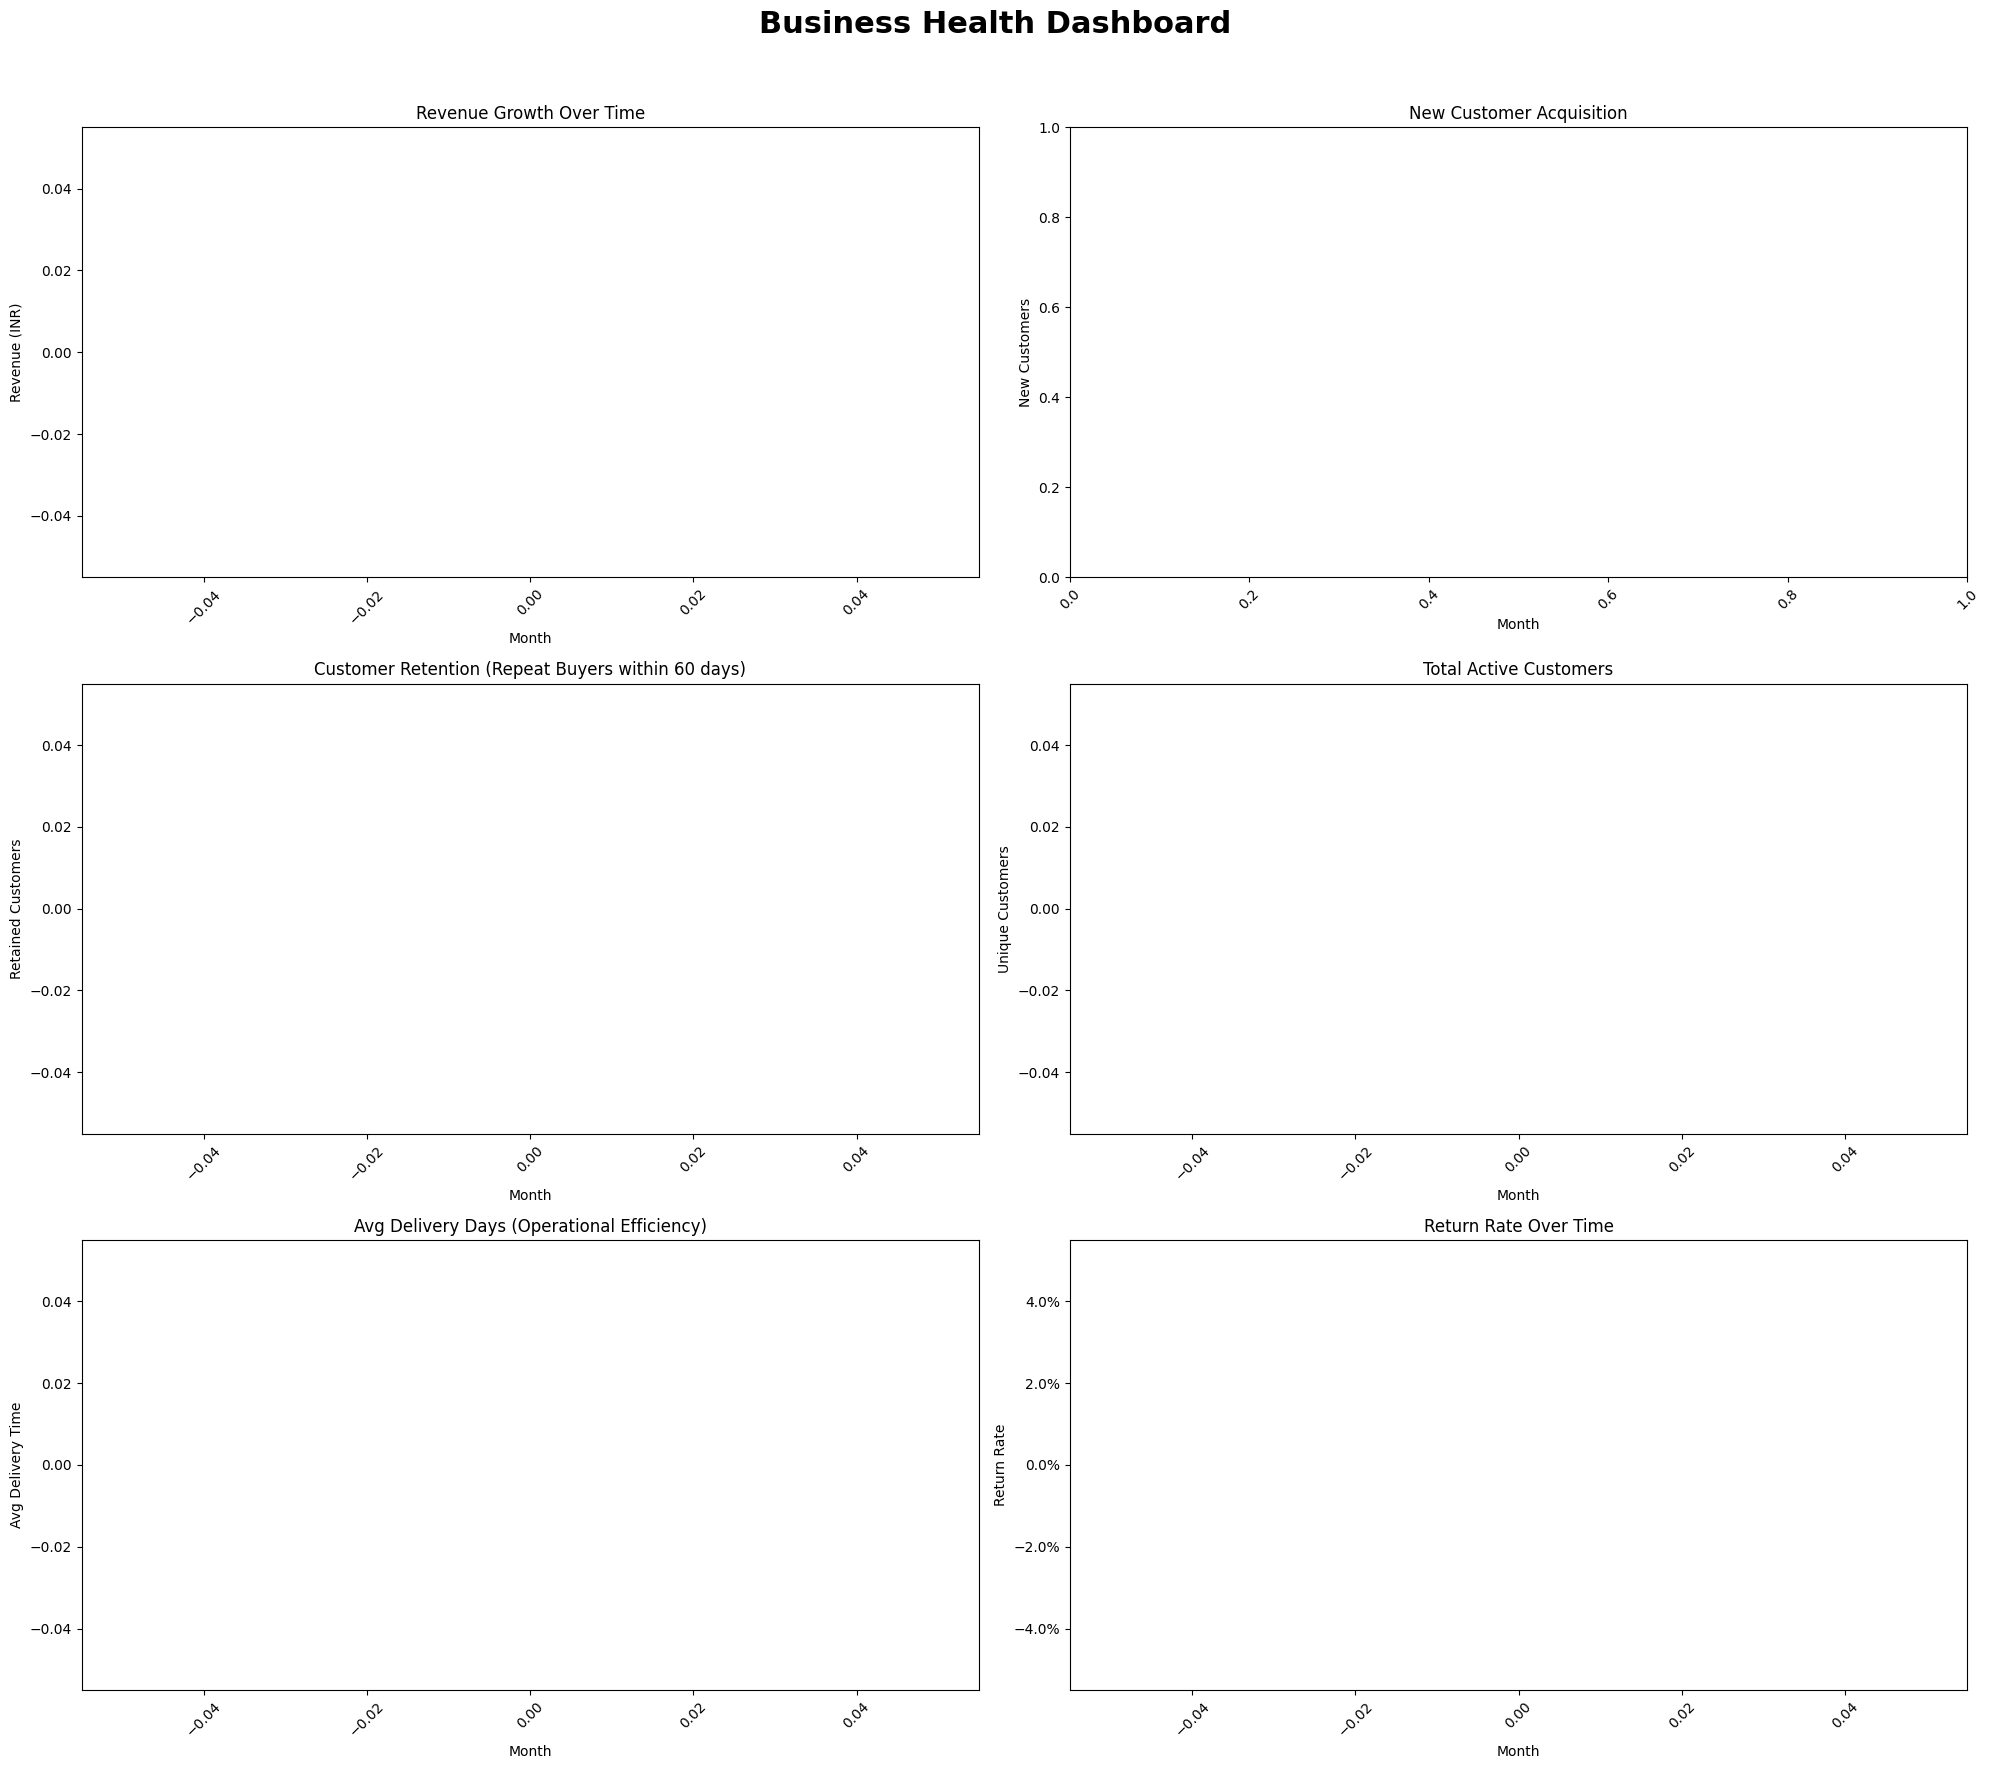

In [115]:
def business_health_analysis(df):

    # Step 1: Prepare the Data
    # Convert order_date to datetime just to be safe if needed later
    df['clean_order_date'] = pd.to_datetime(df['order_date'], errors='coerce')
    df["order_month"] = pd.to_numeric(df["order_month"], errors='coerce')
    df["order_year"] = pd.to_numeric(df["order_year"], errors='coerce')

    # Use existing order_month and order_year columns as-is
    # (Ensure order_month is a string or datetime-like for plotting)
    # If order_month is integer (like 1-12), consider converting to string or datetime for better x-axis

    # Revenue over time (monthly)
    monthly_revenue = df.groupby('order_month')['clean_final_amount_inr'].sum().reset_index()

    # New Customers per month
    df['is_new_customer'] = ~df['customer_id'].duplicated()
    monthly_new_customers = df[df['is_new_customer']].groupby('order_month')['customer_id'].nunique().reset_index()
    monthly_new_customers.rename(columns={'customer_id': 'new_customers'}, inplace=True)

    # Total Customers per month
    monthly_customers = df.groupby('order_month')['customer_id'].nunique().reset_index()
    monthly_customers.rename(columns={'customer_id': 'total_customers'}, inplace=True)

    # Retention Rate: Customers who ordered again in next month
    df_sorted = df.sort_values(['customer_id', 'clean_order_date'])
    df_sorted['next_order_date'] = df_sorted.groupby('customer_id')['clean_order_date'].shift(-1)
    df_sorted['retained'] = (df_sorted['next_order_date'] - df_sorted['clean_order_date']).dt.days <= 60
    retention_rate = df_sorted[df_sorted['retained'] == True].groupby('order_month')['customer_id'].nunique().reset_index()
    retention_rate.rename(columns={'customer_id': 'retained_customers'}, inplace=True)

    # Merge customer metrics
    customer_metrics = monthly_customers.merge(monthly_new_customers, on='order_month', how='left')
    customer_metrics = customer_metrics.merge(retention_rate, on='order_month', how='left')
    customer_metrics.fillna(0, inplace=True)

    # Operational Efficiency
    avg_delivery_days = df.groupby('order_month')['cleaned_delivery_days'].mean().reset_index()
    return_rate = df.groupby('order_month')['return_status'].apply(lambda x: (x == 'Returned').mean()).reset_index()
    return_rate.rename(columns={'return_status': 'return_rate'}, inplace=True)

    # Step 2: Set up the dashboard layout
    plt.figure(figsize=(20, 18))
    plt.suptitle("Business Health Dashboard", fontsize=22, fontweight='bold')

    # Revenue Growth
    plt.subplot(3, 2, 1)
    sns.lineplot(data=monthly_revenue, x='order_month', y='clean_final_amount_inr', marker='o', color='green')
    plt.title("Revenue Growth Over Time")
    plt.xlabel("Month")
    plt.ylabel("Revenue (INR)")
    plt.xticks(rotation=45)

    # Customer Acquisition
    plt.subplot(3, 2, 2)
    sns.barplot(data=customer_metrics, x='order_month', y='new_customers', color='steelblue')
    plt.title("New Customer Acquisition")
    plt.xlabel("Month")
    plt.ylabel("New Customers")
    plt.xticks(rotation=45)

    # Customer Retention Rate
    plt.subplot(3, 2, 3)
    sns.lineplot(data=customer_metrics, x='order_month', y='retained_customers', marker='o', color='orange')
    plt.title("Customer Retention (Repeat Buyers within 60 days)")
    plt.xlabel("Month")
    plt.ylabel("Retained Customers")
    plt.xticks(rotation=45)

    # Total Unique Customers
    plt.subplot(3, 2, 4)
    sns.lineplot(data=customer_metrics, x='order_month', y='total_customers', marker='o', color='purple')
    plt.title("Total Active Customers")
    plt.xlabel("Month")
    plt.ylabel("Unique Customers")
    plt.xticks(rotation=45)

    # Average Delivery Days
    plt.subplot(3, 2, 5)
    sns.lineplot(data=avg_delivery_days, x='order_month', y='cleaned_delivery_days', marker='o', color='brown')
    plt.title("Avg Delivery Days (Operational Efficiency)")
    plt.xlabel("Month")
    plt.ylabel("Avg Delivery Time")
    plt.xticks(rotation=45)

    # Return Rate
    plt.subplot(3, 2, 6)
    sns.lineplot(data=return_rate, x='order_month', y='return_rate', marker='o', color='red')
    plt.title("Return Rate Over Time")
    plt.xlabel("Month")
    plt.ylabel("Return Rate")
    plt.xticks(rotation=45)
    plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.PercentFormatter(1))

    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust for suptitle
    plt.show()




business_health_analysis(data)

In [33]:
data.columns

Index(['transaction_id', 'order_date', 'customer_id', 'product_id',
       'product_name', 'category', 'subcategory', 'brand',
       'original_price_inr', 'discount_percent', 'discounted_price_inr',
       'quantity', 'subtotal_inr', 'delivery_charges', 'final_amount_inr',
       'customer_city', 'customer_state', 'customer_tier',
       'customer_spending_tier', 'customer_age_group', 'payment_method',
       'delivery_days', 'delivery_type', 'is_prime_member', 'is_festival_sale',
       'festival_name', 'customer_rating', 'return_status', 'order_month',
       'order_year', 'order_quarter', 'product_weight_kg', 'is_prime_eligible',
       'product_rating', 'clean_order_date', 'clean_original_price_inr',
       'clean_discount_percent', 'clean_final_amount_inr',
       'clean_delivery_charges', 'cleaned_customer_rating',
       'cleaned_product_rating', 'cleaned_customer_city',
       'cleaned_is_prime_member', 'cleaned_is_prime_eligible',
       'cleaned_is_festival_sale', 'cleaned_c

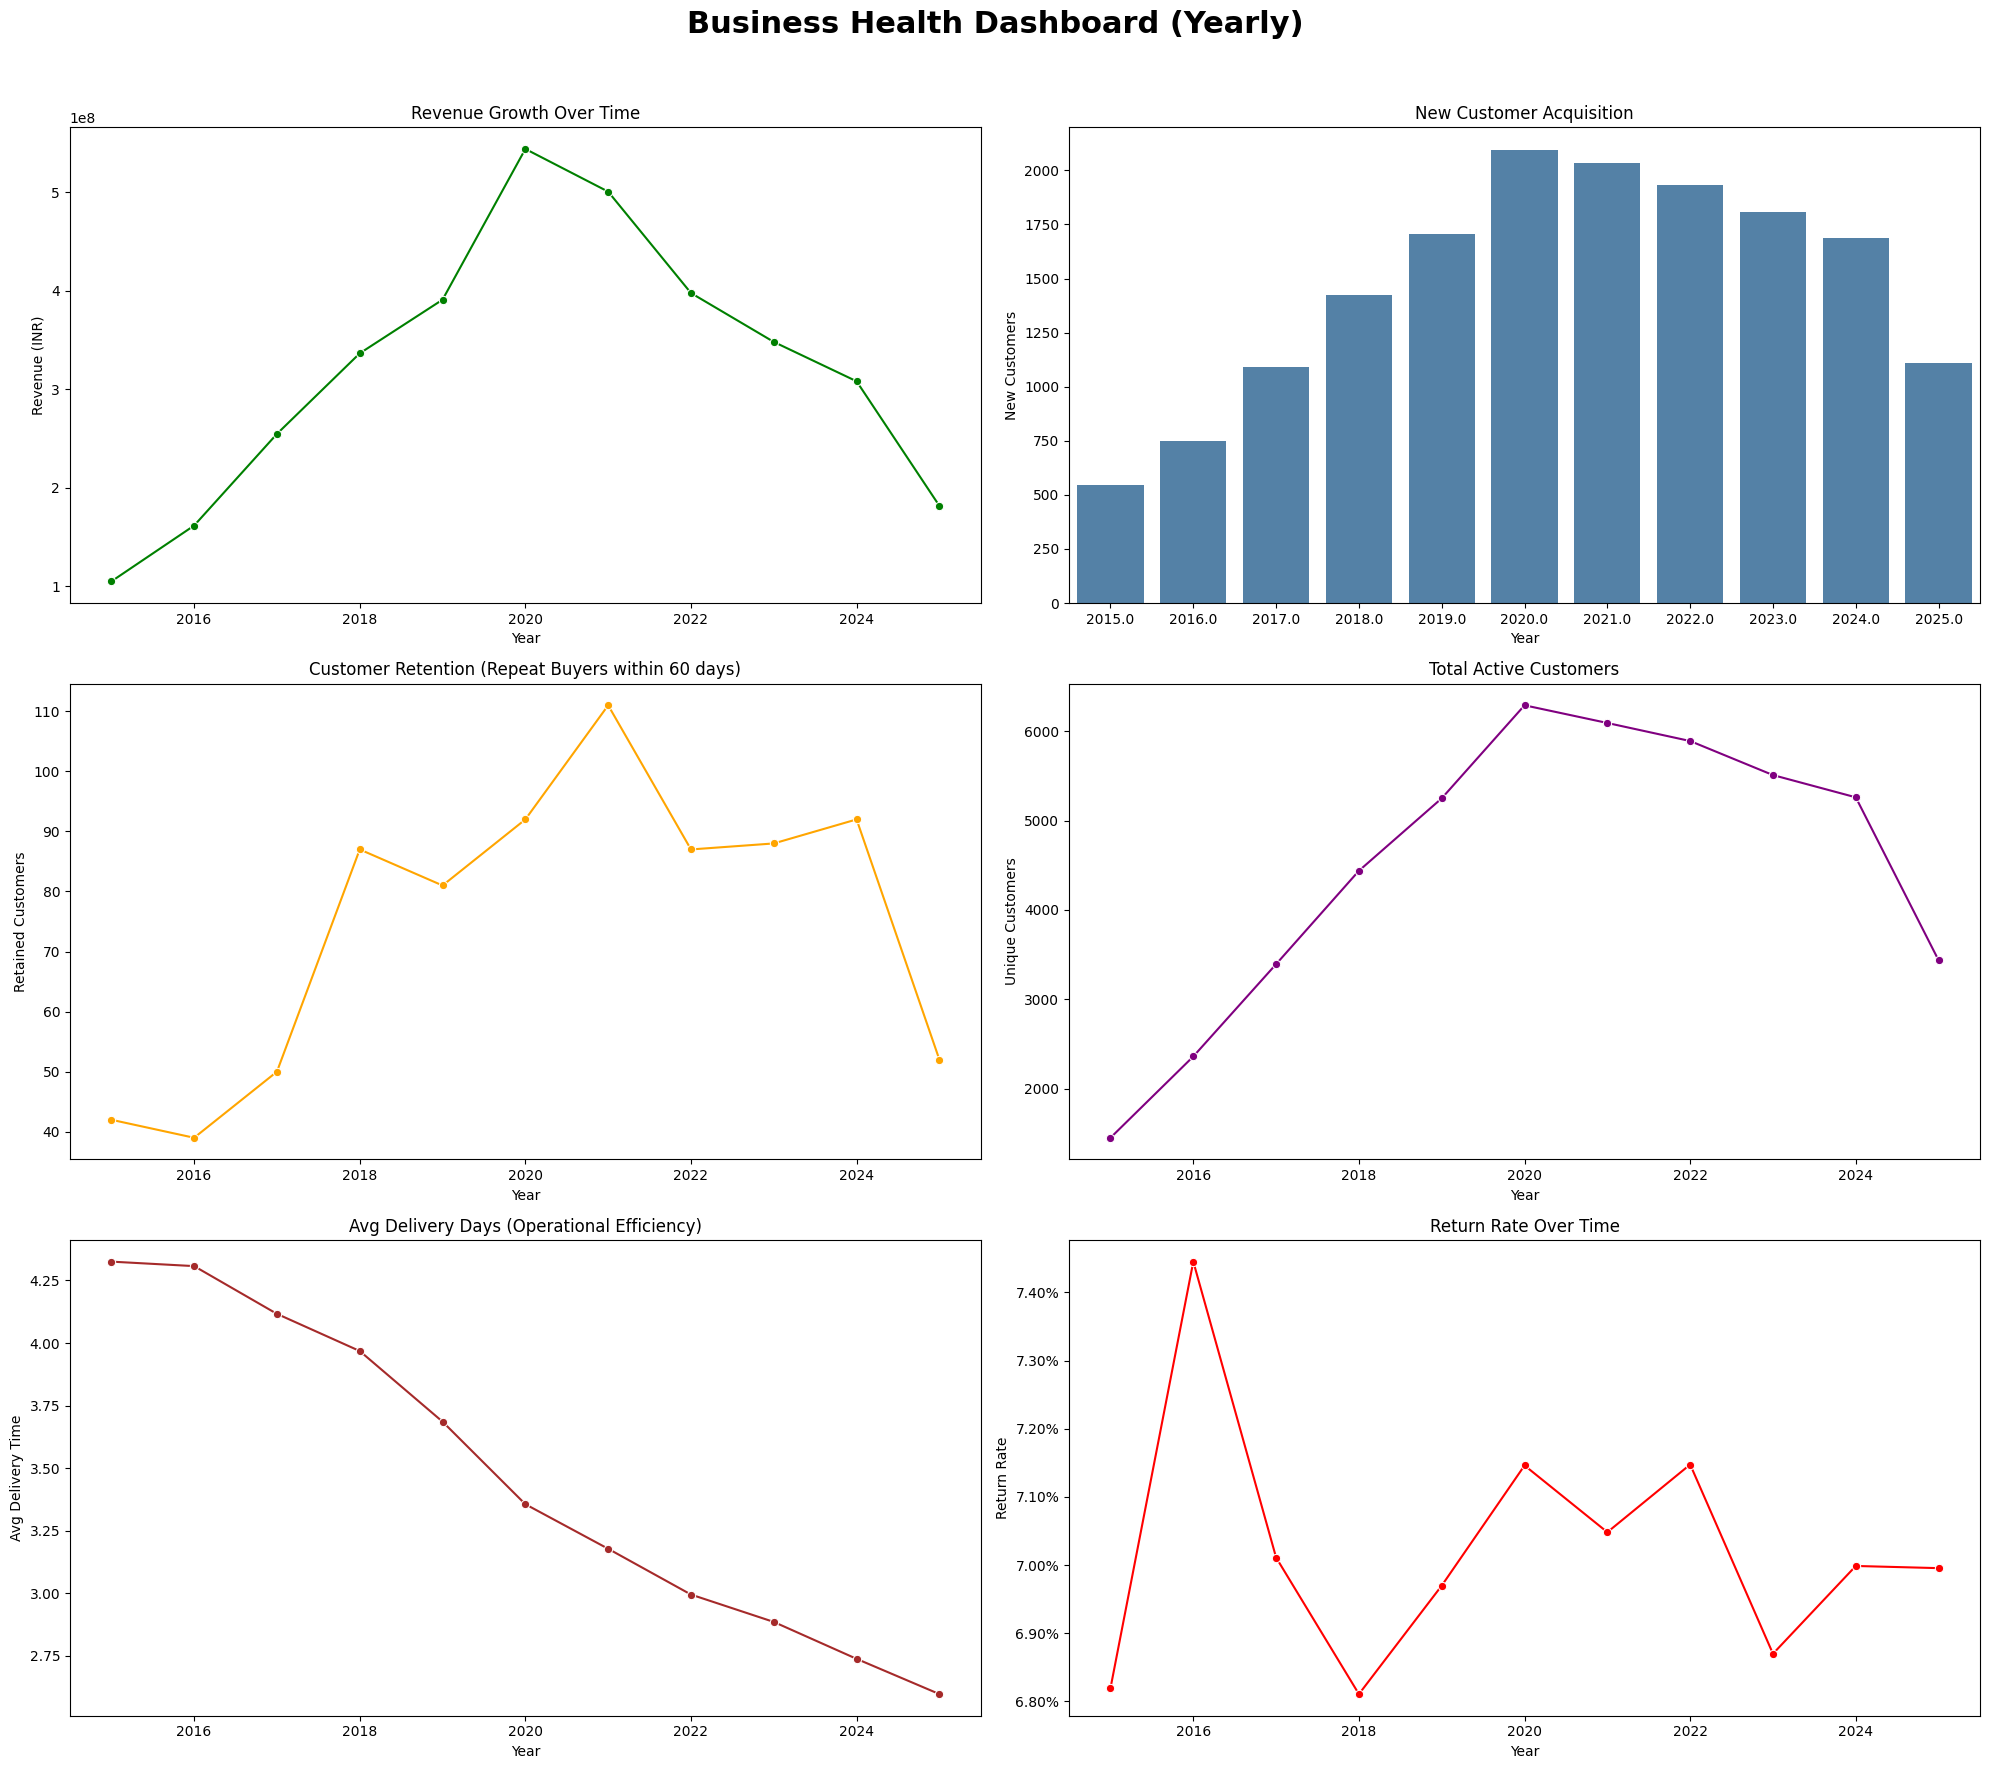

In [117]:
def business_health_analysis_yearly(df):

    # Step 1: Prepare the Data
    df['clean_order_date'] = pd.to_datetime(df['order_date'], errors='coerce')

    # Group by 'order_year' instead of 'order_month'
    
    # Revenue over time (yearly)
    yearly_revenue = df.groupby('order_year')['clean_final_amount_inr'].sum().reset_index()

    # New Customers per year
    df['is_new_customer'] = ~df['customer_id'].duplicated()
    yearly_new_customers = df[df['is_new_customer']].groupby('order_year')['customer_id'].nunique().reset_index()
    yearly_new_customers.rename(columns={'customer_id': 'new_customers'}, inplace=True)

    # Total Customers per year
    yearly_customers = df.groupby('order_year')['customer_id'].nunique().reset_index()
    yearly_customers.rename(columns={'customer_id': 'total_customers'}, inplace=True)

    # Retention Rate: Customers who ordered again within 60 days (approx. 2 months)
    df_sorted = df.sort_values(['customer_id', 'clean_order_date'])
    df_sorted['next_order_date'] = df_sorted.groupby('customer_id')['clean_order_date'].shift(-1)
    df_sorted['retained'] = (df_sorted['next_order_date'] - df_sorted['clean_order_date']).dt.days <= 60
    retention_rate = df_sorted[df_sorted['retained'] == True].groupby('order_year')['customer_id'].nunique().reset_index()
    retention_rate.rename(columns={'customer_id': 'retained_customers'}, inplace=True)

    # Merge customer metrics
    customer_metrics = yearly_customers.merge(yearly_new_customers, on='order_year', how='left')
    customer_metrics = customer_metrics.merge(retention_rate, on='order_year', how='left')
    customer_metrics.fillna(0, inplace=True)

    # Operational Efficiency
    avg_delivery_days = df.groupby('order_year')['cleaned_delivery_days'].mean().reset_index()
    return_rate = df.groupby('order_year')['return_status'].apply(lambda x: (x == 'Returned').mean()).reset_index()
    return_rate.rename(columns={'return_status': 'return_rate'}, inplace=True)

    # Step 2: Set up the dashboard layout
    plt.figure(figsize=(20, 18))
    plt.suptitle("Business Health Dashboard (Yearly)", fontsize=22, fontweight='bold')

    # Revenue Growth
    plt.subplot(3, 2, 1)
    sns.lineplot(data=yearly_revenue, x='order_year', y='clean_final_amount_inr', marker='o', color='green')
    plt.title("Revenue Growth Over Time")
    plt.xlabel("Year")
    plt.ylabel("Revenue (INR)")

    # Customer Acquisition
    plt.subplot(3, 2, 2)
    sns.barplot(data=customer_metrics, x='order_year', y='new_customers', color='steelblue')
    plt.title("New Customer Acquisition")
    plt.xlabel("Year")
    plt.ylabel("New Customers")

    # Customer Retention Rate
    plt.subplot(3, 2, 3)
    sns.lineplot(data=customer_metrics, x='order_year', y='retained_customers', marker='o', color='orange')
    plt.title("Customer Retention (Repeat Buyers within 60 days)")
    plt.xlabel("Year")
    plt.ylabel("Retained Customers")

    # Total Unique Customers
    plt.subplot(3, 2, 4)
    sns.lineplot(data=customer_metrics, x='order_year', y='total_customers', marker='o', color='purple')
    plt.title("Total Active Customers")
    plt.xlabel("Year")
    plt.ylabel("Unique Customers")

    # Average Delivery Days
    plt.subplot(3, 2, 5)
    sns.lineplot(data=avg_delivery_days, x='order_year', y='cleaned_delivery_days', marker='o', color='brown')
    plt.title("Avg Delivery Days (Operational Efficiency)")
    plt.xlabel("Year")
    plt.ylabel("Avg Delivery Time")

    # Return Rate
    plt.subplot(3, 2, 6)
    sns.lineplot(data=return_rate, x='order_year', y='return_rate', marker='o', color='red')
    plt.title("Return Rate Over Time")
    plt.xlabel("Year")
    plt.ylabel("Return Rate")
    plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.PercentFormatter(1))

    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust for suptitle
    plt.savefig("business_health_dashboard_yearly.png", dpi=300, bbox_inches='tight')
    plt.show()

business_health_analysis_yearly(data)